In [290]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split as tts

In [162]:
df=pd.read_csv('usedCarsFinal.csv')

In [163]:
df.head()

,name,location,model_year,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,other_features_list,url,price
0,Toyota Fortuner Legender 2022,"I- 8, Islamabad Islamabad",2022,5 km,Diesel,Automatic,Un-Registered,White,Local,2800 cc,SUV,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/toyota-for...,NaN
1,Toyota Premio X EX Package 1.8 2018,"Askari 6, Peshawar KPK",2018,"17,000 km",Petrol,Automatic,Un-Registered,Peral White,Imported,1800 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/toyota-pre...,8500000.0
2,Honda City Aspire 1.3 i-VTEC 2016,"I- 8, Islamabad Islamabad",2016,"59,000 km",Petrol,Manual,Islamabad,White,Local,1300 cc,Sedan,"ABS,AM/FM Radio,Air Conditioning,Alloy Rims,CD...",https://www.pakwheels.com/used-cars/honda-city...,2375000.0
3,Suzuki Bolan VX Euro II 2018,"Dhok Sayedan Road, Rawalpindi Punjab",2018,"55,000 km",Petrol,Manual,Islamabad,White,Local,800 cc,Van,"AM/FM Radio,Immobilizer Key",https://www.pakwheels.com/used-cars/suzuki-bol...,1050000.0
4,Suzuki Swift GLX CVT 2022,Karachi Sindh,2022,2 km,Petrol,Automatic,Sindh,Grey,Local,1200 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/suzuki-swi...,3550000.0


In [164]:
df.shape

(75899, 14)

In [165]:
df.name

0             Toyota Fortuner Legender  2022
1        Toyota Premio X EX Package 1.8 2018
2          Honda City Aspire 1.3 i-VTEC 2016
3               Suzuki Bolan VX Euro II 2018
4                  Suzuki Swift GLX CVT 2022
                        ...                 
75894                  Honda City i-DSI 2006
75895               Hyundai Elantra GLS 2021
75896    Honda Civic Oriel Prosmatec UG 2013
75897                 Toyota Vitz F 1.0 2002
75898             Daihatsu Cuore CX Eco 2004
Name: name, Length: 75899, dtype: object

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75899 entries, 0 to 75898
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 75899 non-null  object 
 1   location             75899 non-null  object 
 2   model_year           75899 non-null  int64  
 3   mileage              75899 non-null  object 
 4   engine_type          75899 non-null  object 
 5   transmission         75899 non-null  object 
 6   registered_in        75899 non-null  object 
 7   color                75899 non-null  object 
 8   assembly             75899 non-null  object 
 9   engine_capacity      75899 non-null  object 
 10  body_type            67804 non-null  object 
 11  other_features_list  69353 non-null  object 
 12  url                  75899 non-null  object 
 13  price                74771 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 8.1+ MB


In [167]:
df.apply(pd.isnull).sum()

name                      0
location                  0
model_year                0
mileage                   0
engine_type               0
transmission              0
registered_in             0
color                     0
assembly                  0
engine_capacity           0
body_type              8095
other_features_list    6546
url                       0
price                  1128
dtype: int64

In [168]:
df.dropna(axis=0,inplace=True)

In [169]:
df.apply(pd.isnull).sum()

name                   0
location               0
model_year             0
mileage                0
engine_type            0
transmission           0
registered_in          0
color                  0
assembly               0
engine_capacity        0
body_type              0
other_features_list    0
url                    0
price                  0
dtype: int64

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63212 entries, 1 to 75898
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 63212 non-null  object 
 1   location             63212 non-null  object 
 2   model_year           63212 non-null  int64  
 3   mileage              63212 non-null  object 
 4   engine_type          63212 non-null  object 
 5   transmission         63212 non-null  object 
 6   registered_in        63212 non-null  object 
 7   color                63212 non-null  object 
 8   assembly             63212 non-null  object 
 9   engine_capacity      63212 non-null  object 
 10  body_type            63212 non-null  object 
 11  other_features_list  63212 non-null  object 
 12  url                  63212 non-null  object 
 13  price                63212 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 7.2+ MB


In [171]:
df['model_year'].unique()

array([2018, 2016, 2022, 2006, 2017, 2014, 1995, 2015, 2012, 2010, 2013,
       2008, 2007, 2019, 2009, 2021, 2003, 2020, 2005, 1996, 1986, 1992,
       1998, 2011, 2000, 2002, 2004, 1991, 2001, 1997, 1993, 1988, 1999,
       1981, 1994, 1990, 1974, 1982, 1989, 1984, 1987, 1980, 1976, 1985,
       1978, 1975, 1983, 1972, 1973, 1970, 1963, 1977, 1965, 1968, 1979,
       1969, 1971, 1962, 1966, 1967, 1964, 1960], dtype=int64)

In [172]:
df['registered_in'].unique()

array(['Un-Registered', 'Islamabad', 'Sindh', 'Sialkot', 'Bahawalnagar',
       'Karachi', 'Lahore', 'Punjab', 'Multan', 'Abbottabad', 'Gilgit',
       'Rawalpindi', 'Peshawar', 'Faisalabad', 'Rahim Yar Khan',
       'Sahiwal', 'Gujranwala', 'Adda jahan khan', 'Bahawalpur',
       'Sheikhupura', 'Chiniot', 'Quetta', 'Kashmir', 'Nowshera',
       'Hyderabad', 'Iskandarabad', 'Gujrat', 'Sargodha', 'Vehari',
       'Jhelum', 'Swat', 'Attock', 'Bhakkar', 'Mirpur A.K.', 'Kharian',
       'Khushab', 'Mardan', 'Muridke', 'Arifwala', 'Jhang', 'Kohat',
       'Kameer', 'Haroonabad', 'Wah cantt', 'Bannu', 'Sukkur', 'Mansehra',
       'Charsadda', 'D.G.Khan', 'Lasbela', 'Larkana', 'Toba Tek Singh',
       'Nankana sahib', 'Muzaffarabad', 'Taxila', 'Layyah', 'Pishin',
       'Okara', 'Jaranwala', 'Malakand Agency', 'Mandi bahauddin',
       'Haripur', 'Sambrial', 'Muzaffar Gargh', 'Mian Wali',
       'Yazman mandi', 'Topi', 'Pasrur', 'Zahir Peer', 'Rajanpur',
       'Mirpur khas', 'Sibi', 'Chakwal

In [173]:
df.head()

,name,location,model_year,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,other_features_list,url,price
1,Toyota Premio X EX Package 1.8 2018,"Askari 6, Peshawar KPK",2018,"17,000 km",Petrol,Automatic,Un-Registered,Peral White,Imported,1800 cc,Sedan,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/toyota-pre...,8500000.0
2,Honda City Aspire 1.3 i-VTEC 2016,"I- 8, Islamabad Islamabad",2016,"59,000 km",Petrol,Manual,Islamabad,White,Local,1300 cc,Sedan,"ABS,AM/FM Radio,Air Conditioning,Alloy Rims,CD...",https://www.pakwheels.com/used-cars/honda-city...,2375000.0
3,Suzuki Bolan VX Euro II 2018,"Dhok Sayedan Road, Rawalpindi Punjab",2018,"55,000 km",Petrol,Manual,Islamabad,White,Local,800 cc,Van,"AM/FM Radio,Immobilizer Key",https://www.pakwheels.com/used-cars/suzuki-bol...,1050000.0
4,Suzuki Swift GLX CVT 2022,Karachi Sindh,2022,2 km,Petrol,Automatic,Sindh,Grey,Local,1200 cc,Hatchback,"ABS,AM/FM Radio,Air Bags,Air Conditioning,Allo...",https://www.pakwheels.com/used-cars/suzuki-swi...,3550000.0
6,Honda City i-DSI 2006,"Cantt, Sialkot Punjab",2006,"104,000 km",Petrol,Manual,Sialkot,White,Local,1300 cc,Sedan,"AM/FM Radio,Air Conditioning,Cassette Player,P...",https://www.pakwheels.com/used-cars/honda-city...,1490000.0


In [174]:
lst=list(df['other_features_list'].unique())

In [175]:
tot_features=[]
for i in lst:
    x=i.split(',')
    tot_features.extend(x[:])

In [176]:
st_feature=set(tot_features)

In [177]:
st_feature

{'ABS',
 'AM/FM Radio',
 'Air Bags',
 'Air Conditioning',
 'Alloy Rims',
 'CD Player',
 'Cassette Player',
 'Climate Control',
 'CoolBox',
 'Cruise Control',
 'DVD Player',
 'Front Camera',
 'Front Speakers',
 'Heated Seats',
 'Immobilizer Key',
 'Keyless Entry',
 'Navigation System',
 'Power Locks',
 'Power Mirrors',
 'Power Steering',
 'Power Windows',
 'Rear AC Vents',
 'Rear Camera',
 'Rear Seat Entertainment',
 'Rear Speakers',
 'Steering Switches',
 'Sun Roof',
 'USB and Auxillary Cable'}

In [178]:
df[df.duplicated()]

,name,location,model_year,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,other_features_list,url,price


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63212 entries, 1 to 75898
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 63212 non-null  object 
 1   location             63212 non-null  object 
 2   model_year           63212 non-null  int64  
 3   mileage              63212 non-null  object 
 4   engine_type          63212 non-null  object 
 5   transmission         63212 non-null  object 
 6   registered_in        63212 non-null  object 
 7   color                63212 non-null  object 
 8   assembly             63212 non-null  object 
 9   engine_capacity      63212 non-null  object 
 10  body_type            63212 non-null  object 
 11  other_features_list  63212 non-null  object 
 12  url                  63212 non-null  object 
 13  price                63212 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 7.2+ MB


In [180]:
lst_features=[]
lst_features

[]

In [181]:
for i in st_feature:
    tmb_lst=[]
    for j in df['other_features_list']:
        if(j.count(i)!=0):
            tmb_lst.append(1)
        else:
            tmb_lst.append(0)
        lst_features.append(tmb_lst)

In [182]:
lst_features[6].count(0)

0

In [183]:
x=0
for i in st_feature:
    df[i]=lst_features[x]
    x+=1
    

In [184]:
df.head()


,name,location,model_year,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,...,Power Windows,Air Conditioning,Cruise Control,Front Speakers,AM/FM Radio,CoolBox,Power Locks,Keyless Entry,Immobilizer Key,ABS
1,Toyota Premio X EX Package 1.8 2018,"Askari 6, Peshawar KPK",2018,"17,000 km",Petrol,Automatic,Un-Registered,Peral White,Imported,1800 cc,...,1,1,1,1,1,1,1,1,1,1
2,Honda City Aspire 1.3 i-VTEC 2016,"I- 8, Islamabad Islamabad",2016,"59,000 km",Petrol,Manual,Islamabad,White,Local,1300 cc,...,1,1,1,1,1,1,1,1,1,1
3,Suzuki Bolan VX Euro II 2018,"Dhok Sayedan Road, Rawalpindi Punjab",2018,"55,000 km",Petrol,Manual,Islamabad,White,Local,800 cc,...,1,1,1,1,1,1,1,1,1,1
4,Suzuki Swift GLX CVT 2022,Karachi Sindh,2022,2 km,Petrol,Automatic,Sindh,Grey,Local,1200 cc,...,1,1,1,1,1,1,1,1,1,1
6,Honda City i-DSI 2006,"Cantt, Sialkot Punjab",2006,"104,000 km",Petrol,Manual,Sialkot,White,Local,1300 cc,...,1,1,1,1,1,1,1,1,1,1


In [185]:
df.drop('other_features_list',inplace=True,axis=1)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63212 entries, 1 to 75898
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     63212 non-null  object 
 1   location                 63212 non-null  object 
 2   model_year               63212 non-null  int64  
 3   mileage                  63212 non-null  object 
 4   engine_type              63212 non-null  object 
 5   transmission             63212 non-null  object 
 6   registered_in            63212 non-null  object 
 7   color                    63212 non-null  object 
 8   assembly                 63212 non-null  object 
 9   engine_capacity          63212 non-null  object 
 10  body_type                63212 non-null  object 
 11  url                      63212 non-null  object 
 12  price                    63212 non-null  float64
 13  Rear Seat Entertainment  63212 non-null  int64  
 14  DVD Player            

In [187]:
df.head()

,name,location,model_year,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,...,Power Windows,Air Conditioning,Cruise Control,Front Speakers,AM/FM Radio,CoolBox,Power Locks,Keyless Entry,Immobilizer Key,ABS
1,Toyota Premio X EX Package 1.8 2018,"Askari 6, Peshawar KPK",2018,"17,000 km",Petrol,Automatic,Un-Registered,Peral White,Imported,1800 cc,...,1,1,1,1,1,1,1,1,1,1
2,Honda City Aspire 1.3 i-VTEC 2016,"I- 8, Islamabad Islamabad",2016,"59,000 km",Petrol,Manual,Islamabad,White,Local,1300 cc,...,1,1,1,1,1,1,1,1,1,1
3,Suzuki Bolan VX Euro II 2018,"Dhok Sayedan Road, Rawalpindi Punjab",2018,"55,000 km",Petrol,Manual,Islamabad,White,Local,800 cc,...,1,1,1,1,1,1,1,1,1,1
4,Suzuki Swift GLX CVT 2022,Karachi Sindh,2022,2 km,Petrol,Automatic,Sindh,Grey,Local,1200 cc,...,1,1,1,1,1,1,1,1,1,1
6,Honda City i-DSI 2006,"Cantt, Sialkot Punjab",2006,"104,000 km",Petrol,Manual,Sialkot,White,Local,1300 cc,...,1,1,1,1,1,1,1,1,1,1


In [188]:
df['mileage']=df['mileage'].str[0:-2]

In [189]:
def mk_float(x):
    try:
        if(x.find(',')):
            k=x.count(',')
            for i in range(0,k):
                y=x.find(',')
                x=x[0:y]+x[y+1:]
        return float(x)
    except:
        print(x)
        return np.nan
df['mileage']=df['mileage'].apply(mk_float)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63212 entries, 1 to 75898
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     63212 non-null  object 
 1   location                 63212 non-null  object 
 2   model_year               63212 non-null  int64  
 3   mileage                  63212 non-null  float64
 4   engine_type              63212 non-null  object 
 5   transmission             63212 non-null  object 
 6   registered_in            63212 non-null  object 
 7   color                    63212 non-null  object 
 8   assembly                 63212 non-null  object 
 9   engine_capacity          63212 non-null  object 
 10  body_type                63212 non-null  object 
 11  url                      63212 non-null  object 
 12  price                    63212 non-null  float64
 13  Rear Seat Entertainment  63212 non-null  int64  
 14  DVD Player            

In [191]:
df['engine_type'].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'CNG', 'Electric', 'LPG'],
      dtype=object)

In [192]:
def ohc_transmission(x):
    if x=='Automatic':
        return 1
    else:
        return 0

In [193]:

df['transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [194]:
df['transmission']=df['transmission'].apply(ohc_transmission)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63212 entries, 1 to 75898
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     63212 non-null  object 
 1   location                 63212 non-null  object 
 2   model_year               63212 non-null  int64  
 3   mileage                  63212 non-null  float64
 4   engine_type              63212 non-null  object 
 5   transmission             63212 non-null  int64  
 6   registered_in            63212 non-null  object 
 7   color                    63212 non-null  object 
 8   assembly                 63212 non-null  object 
 9   engine_capacity          63212 non-null  object 
 10  body_type                63212 non-null  object 
 11  url                      63212 non-null  object 
 12  price                    63212 non-null  float64
 13  Rear Seat Entertainment  63212 non-null  int64  
 14  DVD Player            

In [196]:
df['registered_in'].unique()

array(['Un-Registered', 'Islamabad', 'Sindh', 'Sialkot', 'Bahawalnagar',
       'Karachi', 'Lahore', 'Punjab', 'Multan', 'Abbottabad', 'Gilgit',
       'Rawalpindi', 'Peshawar', 'Faisalabad', 'Rahim Yar Khan',
       'Sahiwal', 'Gujranwala', 'Adda jahan khan', 'Bahawalpur',
       'Sheikhupura', 'Chiniot', 'Quetta', 'Kashmir', 'Nowshera',
       'Hyderabad', 'Iskandarabad', 'Gujrat', 'Sargodha', 'Vehari',
       'Jhelum', 'Swat', 'Attock', 'Bhakkar', 'Mirpur A.K.', 'Kharian',
       'Khushab', 'Mardan', 'Muridke', 'Arifwala', 'Jhang', 'Kohat',
       'Kameer', 'Haroonabad', 'Wah cantt', 'Bannu', 'Sukkur', 'Mansehra',
       'Charsadda', 'D.G.Khan', 'Lasbela', 'Larkana', 'Toba Tek Singh',
       'Nankana sahib', 'Muzaffarabad', 'Taxila', 'Layyah', 'Pishin',
       'Okara', 'Jaranwala', 'Malakand Agency', 'Mandi bahauddin',
       'Haripur', 'Sambrial', 'Muzaffar Gargh', 'Mian Wali',
       'Yazman mandi', 'Topi', 'Pasrur', 'Zahir Peer', 'Rajanpur',
       'Mirpur khas', 'Sibi', 'Chakwal

In [197]:
def ohc_assembly(x):
    if(x=='Imported'):
        return 1
    else :
        return 0

In [198]:
df['assembly'].unique()

array(['Imported', 'Local'], dtype=object)

In [199]:
df['assembly']=df['assembly'].apply(ohc_assembly)

In [200]:
df['assembly'].unique()

array([1, 0], dtype=int64)

In [201]:
df['engine_capacity'].unique()

array(['1800 cc', '1300 cc', '800 cc', '1200 cc', '1500 cc', '1000 cc',
       '660 cc', '2700 cc', '1600 cc', '2000 cc', '2800 cc', '4600 cc',
       '3000 cc', '3500 cc', '4200 cc', '4000 cc', '3300 cc', '2500 cc',
       '1323 cc', '2400 cc', '5663 cc', '100 cc', '1400 cc', '6200 cc',
       '2300 cc', '4700 cc', '3400 cc', '5700 cc', '60.0 kWh', '4500 cc',
       '1198 cc', '2100 cc', '3700 cc', '4164 cc', '1700 cc',
       '2000.0 kWh', '2171 cc', '1100 cc', '4400 cc', '5461 cc',
       '44.5 kWh', '4663 cc', '1500.0 kWh', '4608 cc', '93.4 kWh',
       '2600 cc', '1496 cc', '3378 cc', '1900 cc', '3600 cc', '2200 cc',
       '71.0 kWh', '1668 cc', '5000 cc', '75.0 kWh', '4999 cc', '6208 cc',
       '81.5 kWh', '3200 cc', '50.0 kWh', '3799 cc', '40.0 kWh',
       '230.0 kWh', '108.0 kWh', '95.0 kWh', '3661 cc', '5500 cc',
       '700 cc', '44.0 kWh', '3342 cc', '6500.0 kWh', '1498 cc',
       '6300 cc', '3724 cc', '22.0 kWh', '1200.0 kWh', '3800 cc',
       '1000.0 kWh', '1660 cc', 

In [202]:
lst_type=[[],[]]
for i in df['engine_capacity']:
    if(i.count('cc')!=0):
        try:
            x=float(i[0:-3])
            lst_type[1].append(float(0))
            lst_type[0].append(x)
        except:
            lst_type[1].append(float(0))
            lst_type[0].append(np.na)
    if(i.count('kWh')!=0):
        try:
            x=float(i[0:-4])
            lst_type[0].append(float(0))
            lst_type[1].append(x)
        except:
            lst_type[0].append(float(0))
            lst_type[1].append(np.na)
            
df['Gas']=lst_type[0]
df['electric']=lst_type[1]
for i in lst_type[1]:
    if( i>0):
        print(i)

60.0
2000.0
60.0
44.5
60.0
1500.0
93.4
60.0
71.0
71.0
60.0
75.0
81.5
50.0
40.0
60.0
60.0
230.0
108.0
95.0
44.0
6500.0
60.0
230.0
60.0
22.0
230.0
1200.0
60.0
60.0
230.0
60.0
1000.0
93.4
1500.0
230.0
50.0
44.5
1200.0
40.0
94.3
71.0
60.0
100.0
1200.0
93.0
60.0
95.0
1200.0
1200.0
51.0
230.0
1.0
44.5
40.0
44.5
1800.0
96.0
62.0
2.0
51.1
60.0
230.0
60.0
1.5
60.0
50.0
60.0


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63212 entries, 1 to 75898
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     63212 non-null  object 
 1   location                 63212 non-null  object 
 2   model_year               63212 non-null  int64  
 3   mileage                  63212 non-null  float64
 4   engine_type              63212 non-null  object 
 5   transmission             63212 non-null  int64  
 6   registered_in            63212 non-null  object 
 7   color                    63212 non-null  object 
 8   assembly                 63212 non-null  int64  
 9   engine_capacity          63212 non-null  object 
 10  body_type                63212 non-null  object 
 11  url                      63212 non-null  object 
 12  price                    63212 non-null  float64
 13  Rear Seat Entertainment  63212 non-null  int64  
 14  DVD Player            

In [204]:
df.describe()

,model_year,mileage,transmission,assembly,price,Rear Seat Entertainment,DVD Player,Power Steering,Front Camera,USB and Auxillary Cable,...,Cruise Control,Front Speakers,AM/FM Radio,CoolBox,Power Locks,Keyless Entry,Immobilizer Key,ABS,Gas,electric
count,63212.000000,63212.000000,63212.000000,63212.000000,6.321200e+04,63212.0,63212.0,63212.0,63212.0,63212.0,...,63212.0,63212.0,63212.0,63212.0,63212.0,63212.0,63212.0,63212.0,63212.000000,63212.000000
mean,2012.325397,85341.404164,0.531197,0.286496,2.988757e+06,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1442.955230,0.394074
std,7.888839,82365.691815,0.499030,0.452128,4.077650e+06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,682.505079,31.509335
min,1960.000000,1.000000,0.000000,0.000000,1.250000e+05,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
25%,2007.000000,28000.000000,0.000000,0.000000,1.230000e+06,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1000.000000,0.000000
50%,2014.000000,76000.000000,1.000000,0.000000,2.080000e+06,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1300.000000,0.000000
75%,2018.000000,120000.000000,1.000000,1.000000,3.250000e+06,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1600.000000,0.000000
max,2022.000000,1000000.000000,1.000000,1.000000,9.000000e+07,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6606.000000,6500.000000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63212 entries, 1 to 75898
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     63212 non-null  object 
 1   location                 63212 non-null  object 
 2   model_year               63212 non-null  int64  
 3   mileage                  63212 non-null  float64
 4   engine_type              63212 non-null  object 
 5   transmission             63212 non-null  int64  
 6   registered_in            63212 non-null  object 
 7   color                    63212 non-null  object 
 8   assembly                 63212 non-null  int64  
 9   engine_capacity          63212 non-null  object 
 10  body_type                63212 non-null  object 
 11  url                      63212 non-null  object 
 12  price                    63212 non-null  float64
 13  Rear Seat Entertainment  63212 non-null  int64  
 14  DVD Player            

In [206]:
df['body_type'].unique()

array(['Sedan', 'Van', 'Hatchback', 'Compact sedan', 'Crossover', 'SUV',
       'Mini Van', 'Double Cabin', 'Station Wagon', 'Compact SUV', 'MPV',
       'Off-Road Vehicles', 'Subcompact hatchback', 'Coupe', 'Micro Van',
       'Pick Up', 'Convertible', 'Single Cabin', 'High Roof', 'Truck',
       'Mini Vehicles'], dtype=object)

In [207]:
df[['name','url']]

,name,url
1,Toyota Premio X EX Package 1.8 2018,https://www.pakwheels.com/used-cars/toyota-pre...
2,Honda City Aspire 1.3 i-VTEC 2016,https://www.pakwheels.com/used-cars/honda-city...
3,Suzuki Bolan VX Euro II 2018,https://www.pakwheels.com/used-cars/suzuki-bol...
4,Suzuki Swift GLX CVT 2022,https://www.pakwheels.com/used-cars/suzuki-swi...
6,Honda City i-DSI 2006,https://www.pakwheels.com/used-cars/honda-city...
...,...,...
75894,Honda City i-DSI 2006,https://www.pakwheels.com/used-cars/honda-city...
75895,Hyundai Elantra GLS 2021,https://www.pakwheels.com/used-cars/hyundai-el...
75896,Honda Civic Oriel Prosmatec UG 2013,https://www.pakwheels.com/used-cars/honda-civi...
75897,Toyota Vitz F 1.0 2002,https://www.pakwheels.com/used-cars/toyota-vit...


In [208]:
df.drop('url',axis=1,inplace=True)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63212 entries, 1 to 75898
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     63212 non-null  object 
 1   location                 63212 non-null  object 
 2   model_year               63212 non-null  int64  
 3   mileage                  63212 non-null  float64
 4   engine_type              63212 non-null  object 
 5   transmission             63212 non-null  int64  
 6   registered_in            63212 non-null  object 
 7   color                    63212 non-null  object 
 8   assembly                 63212 non-null  int64  
 9   engine_capacity          63212 non-null  object 
 10  body_type                63212 non-null  object 
 11  price                    63212 non-null  float64
 12  Rear Seat Entertainment  63212 non-null  int64  
 13  DVD Player               63212 non-null  int64  
 14  Power Steering        

In [210]:
lst_columns=list(df.columns)

In [260]:
ffdf['age']=2023-ffdf['model_year']

C:\Users\zacks\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [212]:
lst=[]
for i in range(0,len(lst_columns)):
    lst.append(lst_columns[i].replace(" ", "_"))
lst

['name',
 'location',
 'model_year',
 'mileage',
 'engine_type',
 'transmission',
 'registered_in',
 'color',
 'assembly',
 'engine_capacity',
 'body_type',
 'price',
 'Rear_Seat_Entertainment',
 'DVD_Player',
 'Power_Steering',
 'Front_Camera',
 'USB_and_Auxillary_Cable',
 'Rear_AC_Vents',
 'Sun_Roof',
 'Cassette_Player',
 'Heated_Seats',
 'Rear_Speakers',
 'Rear_Camera',
 'Climate_Control',
 'Navigation_System',
 'Steering_Switches',
 'Alloy_Rims',
 'Air_Bags',
 'Power_Mirrors',
 'CD_Player',
 'Power_Windows',
 'Air_Conditioning',
 'Cruise_Control',
 'Front_Speakers',
 'AM/FM_Radio',
 'CoolBox',
 'Power_Locks',
 'Keyless_Entry',
 'Immobilizer_Key',
 'ABS',
 'Gas',
 'electric']

In [213]:
df.columns=lst
lst

['name',
 'location',
 'model_year',
 'mileage',
 'engine_type',
 'transmission',
 'registered_in',
 'color',
 'assembly',
 'engine_capacity',
 'body_type',
 'price',
 'Rear_Seat_Entertainment',
 'DVD_Player',
 'Power_Steering',
 'Front_Camera',
 'USB_and_Auxillary_Cable',
 'Rear_AC_Vents',
 'Sun_Roof',
 'Cassette_Player',
 'Heated_Seats',
 'Rear_Speakers',
 'Rear_Camera',
 'Climate_Control',
 'Navigation_System',
 'Steering_Switches',
 'Alloy_Rims',
 'Air_Bags',
 'Power_Mirrors',
 'CD_Player',
 'Power_Windows',
 'Air_Conditioning',
 'Cruise_Control',
 'Front_Speakers',
 'AM/FM_Radio',
 'CoolBox',
 'Power_Locks',
 'Keyless_Entry',
 'Immobilizer_Key',
 'ABS',
 'Gas',
 'electric']

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63212 entries, 1 to 75898
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     63212 non-null  object 
 1   location                 63212 non-null  object 
 2   model_year               63212 non-null  int64  
 3   mileage                  63212 non-null  float64
 4   engine_type              63212 non-null  object 
 5   transmission             63212 non-null  int64  
 6   registered_in            63212 non-null  object 
 7   color                    63212 non-null  object 
 8   assembly                 63212 non-null  int64  
 9   engine_capacity          63212 non-null  object 
 10  body_type                63212 non-null  object 
 11  price                    63212 non-null  float64
 12  Rear_Seat_Entertainment  63212 non-null  int64  
 13  DVD_Player               63212 non-null  int64  
 14  Power_Steering        

In [215]:
df['Alloy_Rims'].value_counts()

1    63212
Name: Alloy_Rims, dtype: int64

In [216]:
onc=[ 'Power_Locks',
 'Front_Camera',
 'Immobilizer_Key',
 'Cruise_Control',
 'Rear_Seat_Entertainment',
 'AM/FM_Radio',
 'Heated_Seats',
 'Navigation_System',
 'CD_Player',
 'Power_Steering',
 'Alloy_Rims',
 'Rear_Speakers',
 'Cassette_Player',
 'Air_Conditioning',
 'Power_Mirrors',
 'Rear_Camera',
 'CoolBox',
 'Steering_Switches',
 'Rear_AC_Vents',
 'Front_Speakers',
 'Climate_Control',
 'Air_Bags',
 'Sun_Roof',
 'Keyless_Entry',
 'ABS',
 'Power_Windows',
 'USB_and_Auxillary_Cable',
 'DVD_Player']
len(onc)

28

In [217]:
to_drop=df[df[[i for i in onc]].sum(axis=1)==0]
lst=to_drop.index
df.drop(lst,axis=0,inplace=True)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63212 entries, 1 to 75898
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     63212 non-null  object 
 1   location                 63212 non-null  object 
 2   model_year               63212 non-null  int64  
 3   mileage                  63212 non-null  float64
 4   engine_type              63212 non-null  object 
 5   transmission             63212 non-null  int64  
 6   registered_in            63212 non-null  object 
 7   color                    63212 non-null  object 
 8   assembly                 63212 non-null  int64  
 9   engine_capacity          63212 non-null  object 
 10  body_type                63212 non-null  object 
 11  price                    63212 non-null  float64
 12  Rear_Seat_Entertainment  63212 non-null  int64  
 13  DVD_Player               63212 non-null  int64  
 14  Power_Steering        

In [219]:
to_drop=df[df[[i for i in onc]].sum(axis=1)==0]
to_drop

,name,location,model_year,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,...,Cruise_Control,Front_Speakers,AM/FM_Radio,CoolBox,Power_Locks,Keyless_Entry,Immobilizer_Key,ABS,Gas,electric


In [220]:
df.drop(onc,axis=1,inplace=True)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63212 entries, 1 to 75898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             63212 non-null  object 
 1   location         63212 non-null  object 
 2   model_year       63212 non-null  int64  
 3   mileage          63212 non-null  float64
 4   engine_type      63212 non-null  object 
 5   transmission     63212 non-null  int64  
 6   registered_in    63212 non-null  object 
 7   color            63212 non-null  object 
 8   assembly         63212 non-null  int64  
 9   engine_capacity  63212 non-null  object 
 10  body_type        63212 non-null  object 
 11  price            63212 non-null  float64
 12  Gas              63212 non-null  float64
 13  electric         63212 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 9.2+ MB


# EDA

In [222]:
df[df['electric']!=0].describe()
iqre=230.000000-57.775000

In [223]:
df[df['Gas']!=0].describe()
iqrg=1600.000000-1000.000000

In [224]:
indexes=[]
for i in df.columns:
    if i=='Gas' or i =='electric':
        continue
    if(pd.api.types.is_numeric_dtype(df[i])):
        indexes.extend(detect_outliers(df,0,[i]))

In [225]:
lst=[]
lst=df.index[(df['electric'] >(230.000000+iqre*1.5) )| (df['electric']<(57.775000-1.5*iqre)) & (df['electric'] != 0)].tolist()
lst.extend(df.index[(df['Gas'] >(1600+iqrg*1.5)) | (df['Gas']<(1000-1.5*iqrg)) & (df['Gas'] != 0)].tolist())
indexes.extend(lst)


In [226]:
len(set(indexes))

8843

In [227]:
indexes=list(set(indexes))

In [228]:
ffdf=df[~df.index.isin(indexes)]

In [229]:
ffdf.describe()

,model_year,mileage,transmission,assembly,price,Gas,electric
count,54369.000000,54369.00000,54369.000000,54369.000000,5.436900e+04,54369.000000,54369.000000
mean,2012.922364,79234.10243,0.496790,0.242270,2.185706e+06,1276.064081,0.002805
std,6.802579,58213.23413,0.499994,0.428461,1.273550e+06,388.921587,0.494057
min,1991.000000,1.00000,0.000000,0.000000,1.500000e+05,0.000000,0.000000
25%,2008.000000,31000.00000,0.000000,0.000000,1.200000e+06,1000.000000,0.000000
50%,2014.000000,76000.00000,0.000000,0.000000,1.950000e+06,1300.000000,0.000000
75%,2018.000000,115000.00000,1.000000,0.000000,2.850000e+06,1500.000000,0.000000
max,2022.000000,258000.00000,1.000000,1.000000,6.280000e+06,2500.000000,108.000000


In [230]:
sns.boxplot(ffdf[ffdf['electric']!=0]['electric'])

KeyError: 0

In [231]:
ffdf['miles']=pd.cut(ffdf['mileage'],bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,ffdf['mileage'].max()*1000],labels=["<10000","20000","30000","40000","50000","60000","70000",">80000","<<"])

C:\Users\zacks\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [232]:
ffdf['miles']

2         60000
3         60000
4        <10000
6            <<
7            <<
          ...  
75893        <<
75894        <<
75895     20000
75896        <<
75898        <<
Name: miles, Length: 54369, dtype: category
Categories (9, object): ['<10000' < '20000' < '30000' < '40000' ... '60000' < '70000' < '>80000' < '<<']

In [233]:
ffdf.drop('mileage',axis=1,inplace=True)

C:\Users\zacks\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [234]:
ffdf.drop('engine_capacity',axis=1,inplace=True)

In [235]:
ffdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54369 entries, 2 to 75898
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           54369 non-null  object  
 1   location       54369 non-null  object  
 2   model_year     54369 non-null  int64   
 3   engine_type    54369 non-null  object  
 4   transmission   54369 non-null  int64   
 5   registered_in  54369 non-null  object  
 6   color          54369 non-null  object  
 7   assembly       54369 non-null  int64   
 8   body_type      54369 non-null  object  
 9   price          54369 non-null  float64 
 10  Gas            54369 non-null  float64 
 11  electric       54369 non-null  float64 
 12  miles          54369 non-null  category
dtypes: category(1), float64(3), int64(3), object(6)
memory usage: 5.4+ MB


In [236]:
ffdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54369 entries, 2 to 75898
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           54369 non-null  object  
 1   location       54369 non-null  object  
 2   model_year     54369 non-null  int64   
 3   engine_type    54369 non-null  object  
 4   transmission   54369 non-null  int64   
 5   registered_in  54369 non-null  object  
 6   color          54369 non-null  object  
 7   assembly       54369 non-null  int64   
 8   body_type      54369 non-null  object  
 9   price          54369 non-null  float64 
 10  Gas            54369 non-null  float64 
 11  electric       54369 non-null  float64 
 12  miles          54369 non-null  category
dtypes: category(1), float64(3), int64(3), object(6)
memory usage: 5.4+ MB


<AxesSubplot:xlabel='body_type', ylabel='price'>

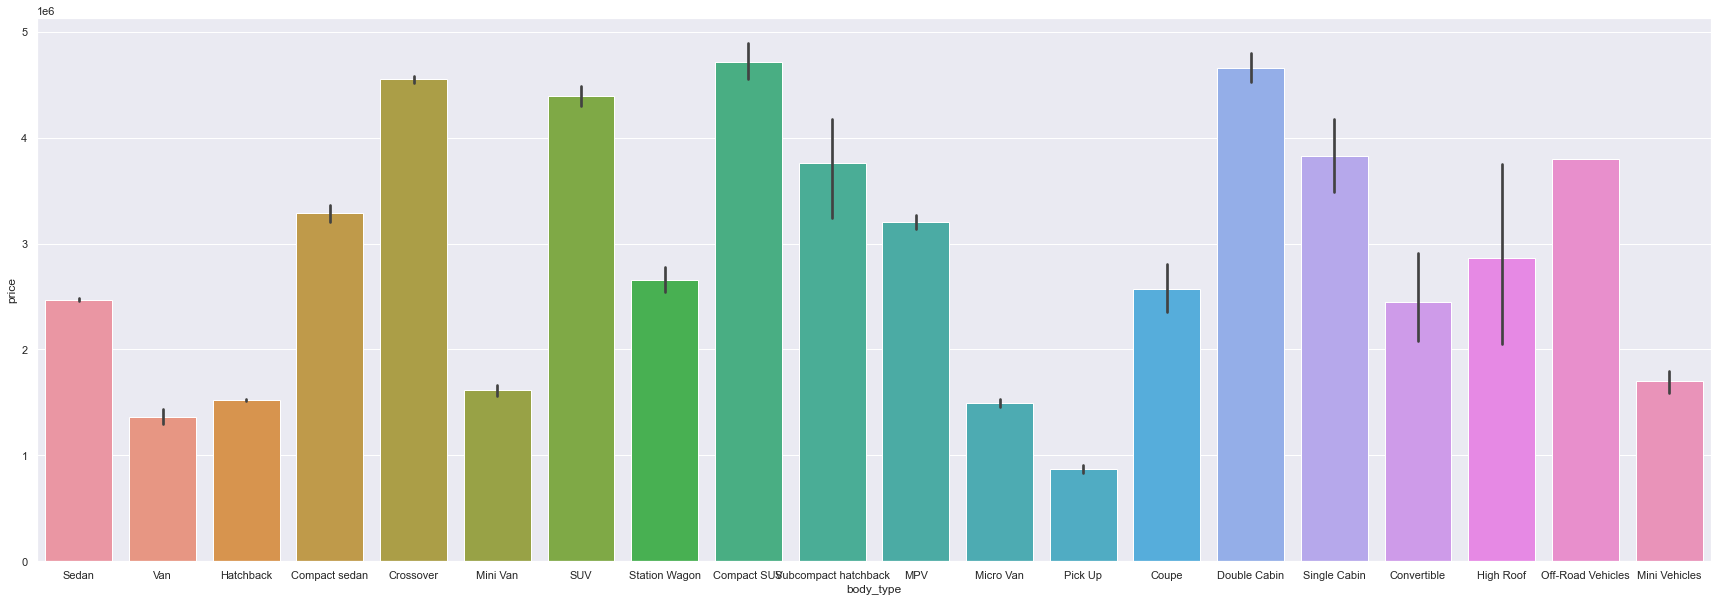

In [237]:
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(data=ffdf,x='body_type',y='price',estimator=np.mean)

<AxesSubplot:xlabel='electric', ylabel='price'>

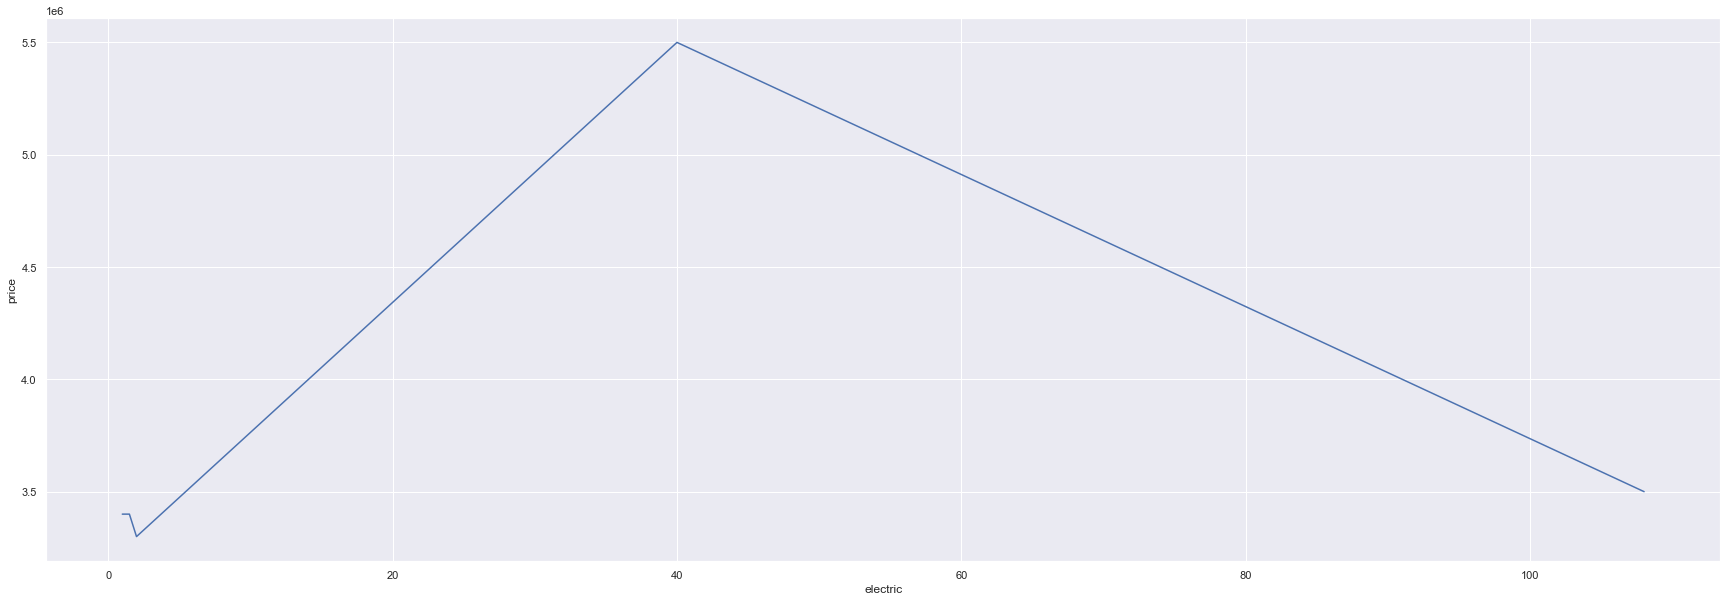

In [238]:
sns.lineplot(x=ffdf[ffdf['electric']!=0]['electric'],y=ffdf[ffdf['electric']!=0]['price'])

<AxesSubplot:xlabel='Gas', ylabel='price'>

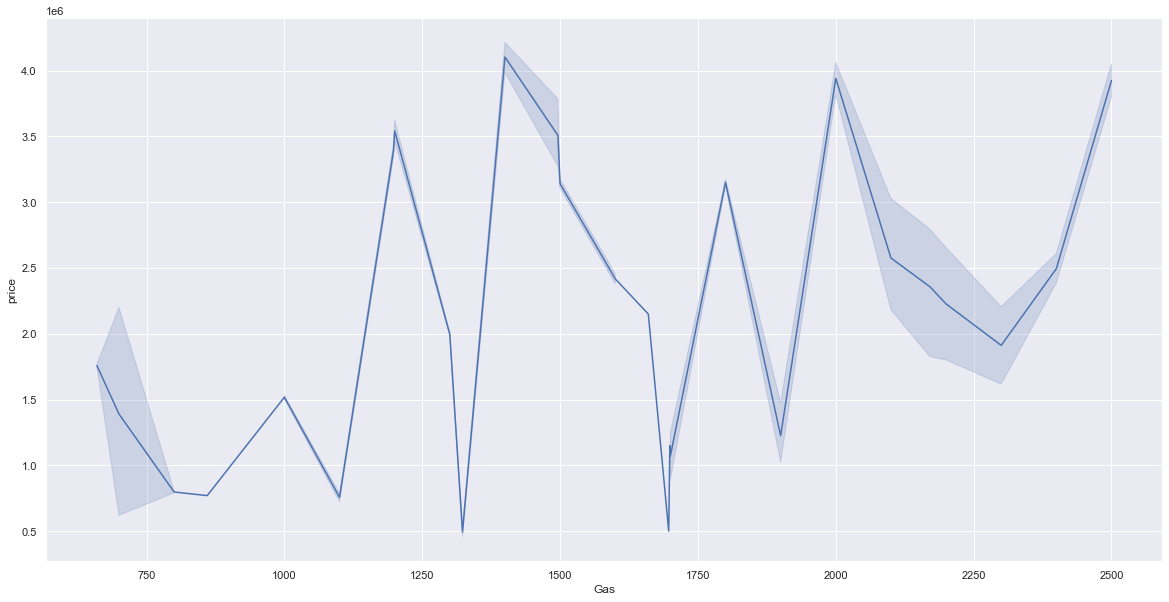

In [239]:
sns.set(rc={'figure.figsize':(20,10)})

sns.lineplot(x=ffdf[ffdf['Gas']!=0]['Gas'],y=ffdf[ffdf['Gas']!=0]['price'])

<AxesSubplot:xlabel='miles', ylabel='price'>

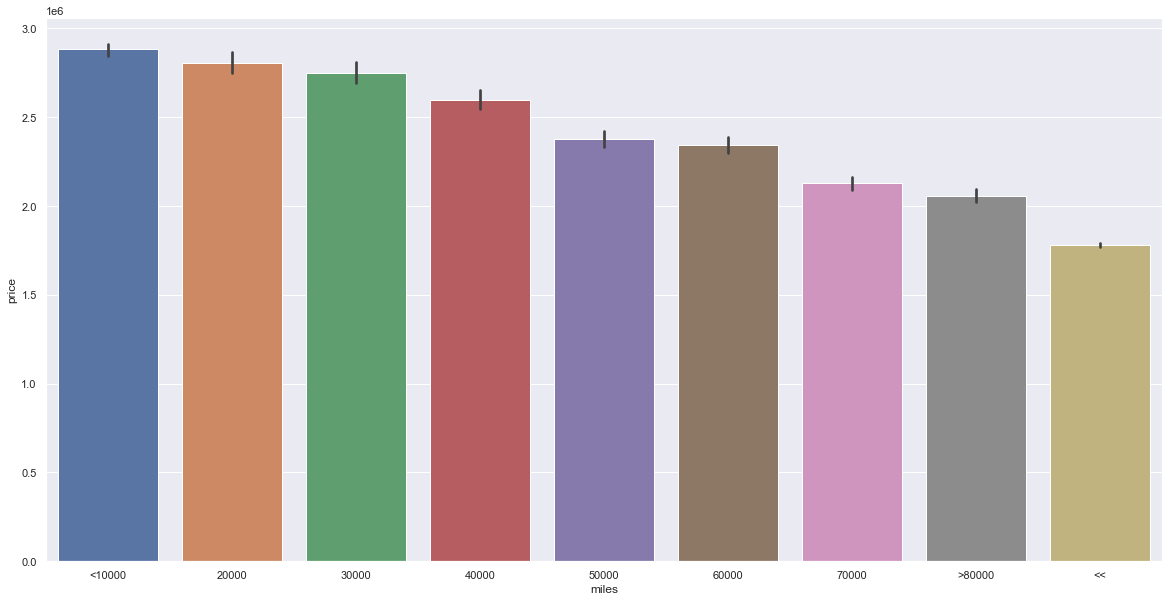

In [240]:
sns.barplot(x='miles',y='price',data=ffdf)

In [241]:
df.engine_capacity

1        1800 cc
2        1300 cc
3         800 cc
4        1200 cc
6        1300 cc
          ...   
75894    1300 cc
75895    2000 cc
75896    1800 cc
75897    1000 cc
75898     800 cc
Name: engine_capacity, Length: 63212, dtype: object

In [242]:
df['location'].value_counts().sort_values()

Alpha Society, Lahore Punjab            1
Dhule, Gujranwala Punjab                1
Moon Colony, Lahore Punjab              1
Model Town, Sargodha Punjab             1
Madina Gardens, Faisalabad Punjab       1
                                     ... 
Johar Town, Lahore Punjab            1095
Karachi Sindh                        1502
DHA Defence, Lahore Punjab           1661
Islamabad Islamabad                  1727
Lahore Punjab                        2024
Name: location, Length: 2266, dtype: int64

<AxesSubplot:xlabel='body_type', ylabel='price'>

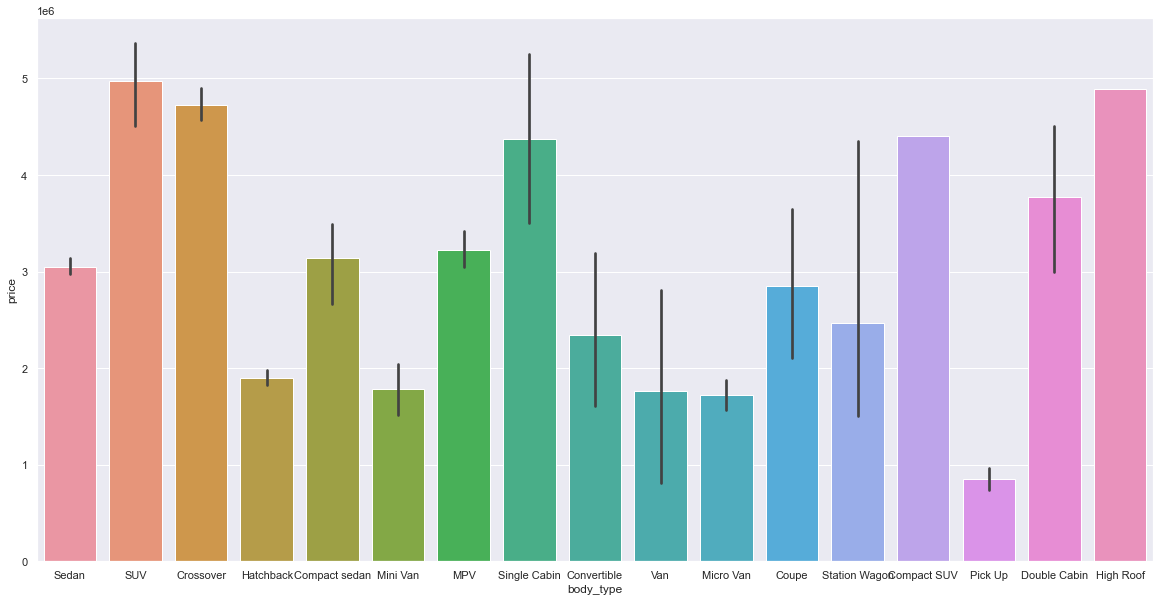

In [243]:
sns.set(rc={'figure.figsize':(20,10)})

sns.barplot(x='body_type',y='price',data=ffdf[ffdf['location']=='Lahore Punjab'],estimator=np.mean)

<AxesSubplot:xlabel='model_year', ylabel='price'>

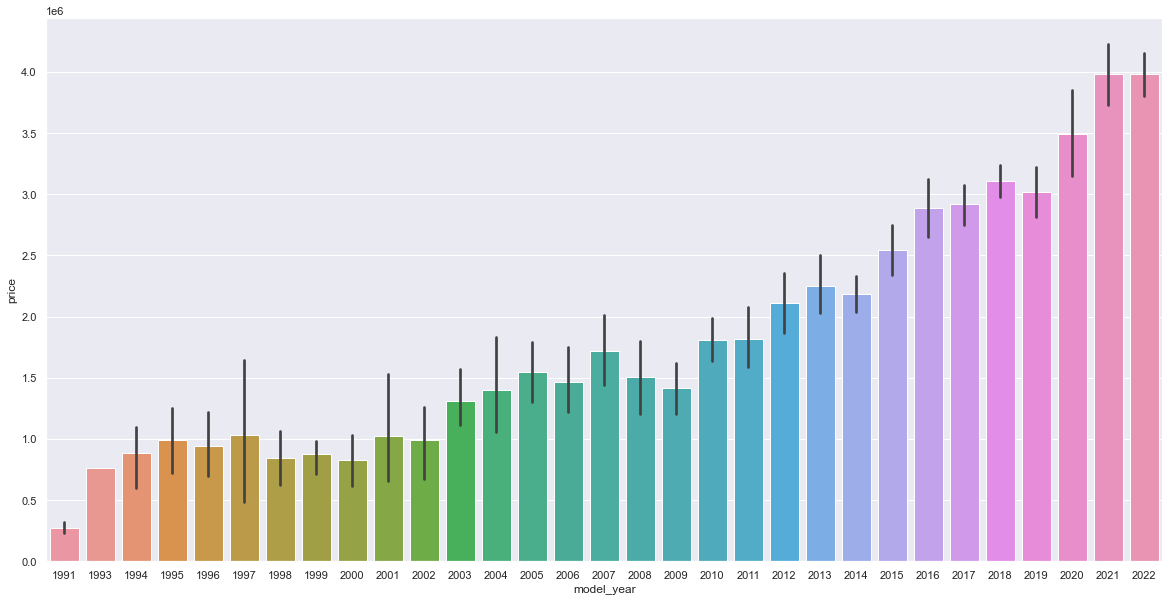

In [244]:
sns.set(rc={'figure.figsize':(20,10)})

sns.barplot(x='model_year',y='price',data=ffdf[ffdf['location']=='Lahore Punjab'],estimator=np.mean)

<AxesSubplot:xlabel='body_type', ylabel='price'>

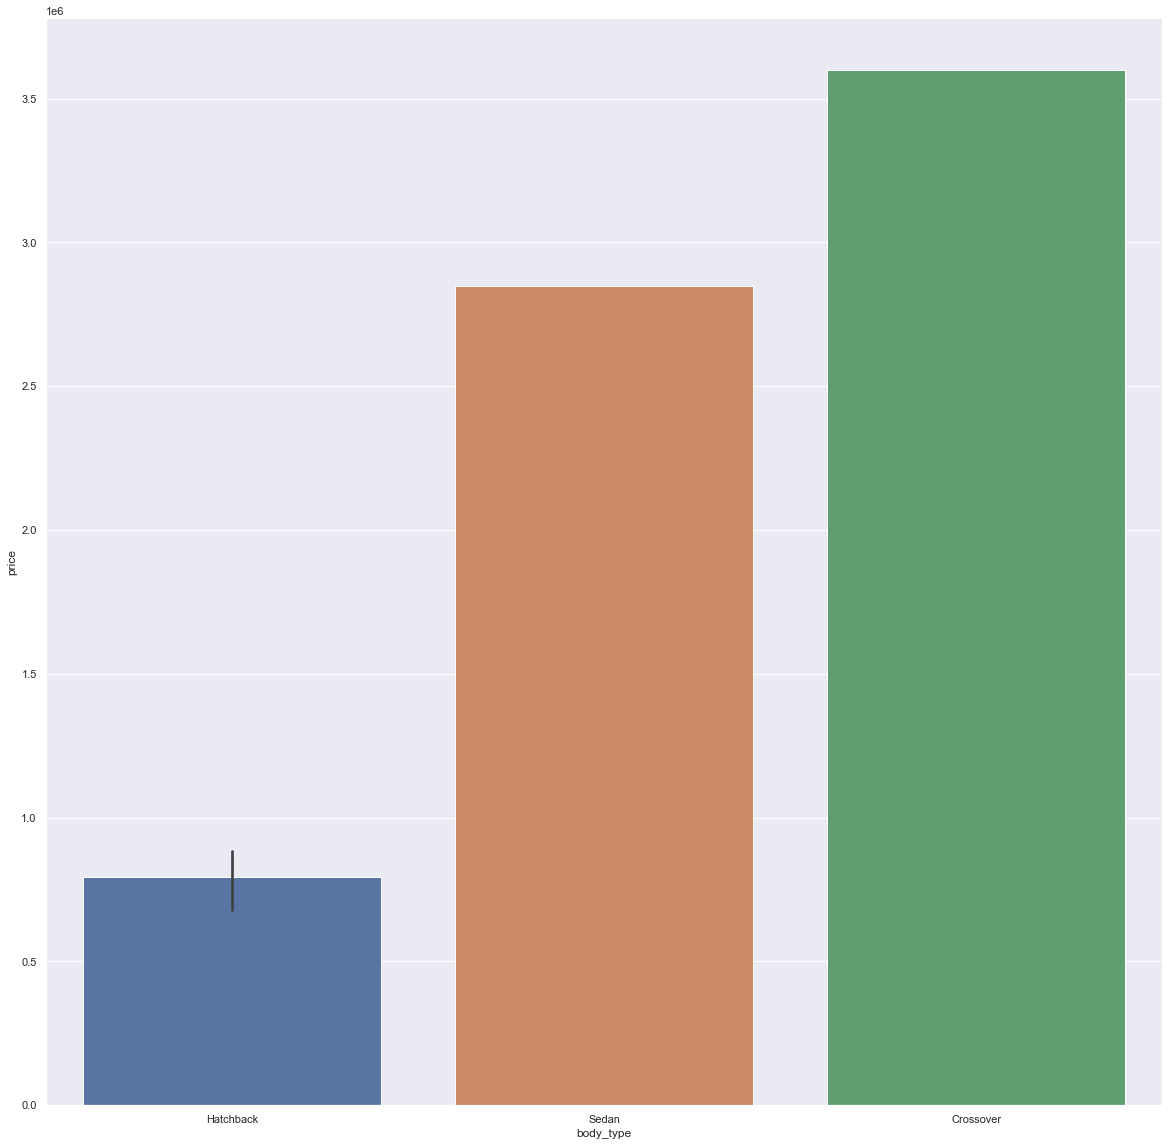

In [245]:
sns.set(rc={'figure.figsize':(20,20)})

sns.barplot(x='body_type',y='price',data=ffdf[(ffdf['location']=='Momin Town, Peshawar KPK')|(ffdf['location']=='Fotress Stadium, Lahore Punjab')|(ffdf['location']=='Tatay Pur, Multan Punjab')|(ffdf['location']=='Alpha Society, Lahore Punjab')|(ffdf['location']=='Nazimabad, Multan Punjab')],estimator=np.mean)

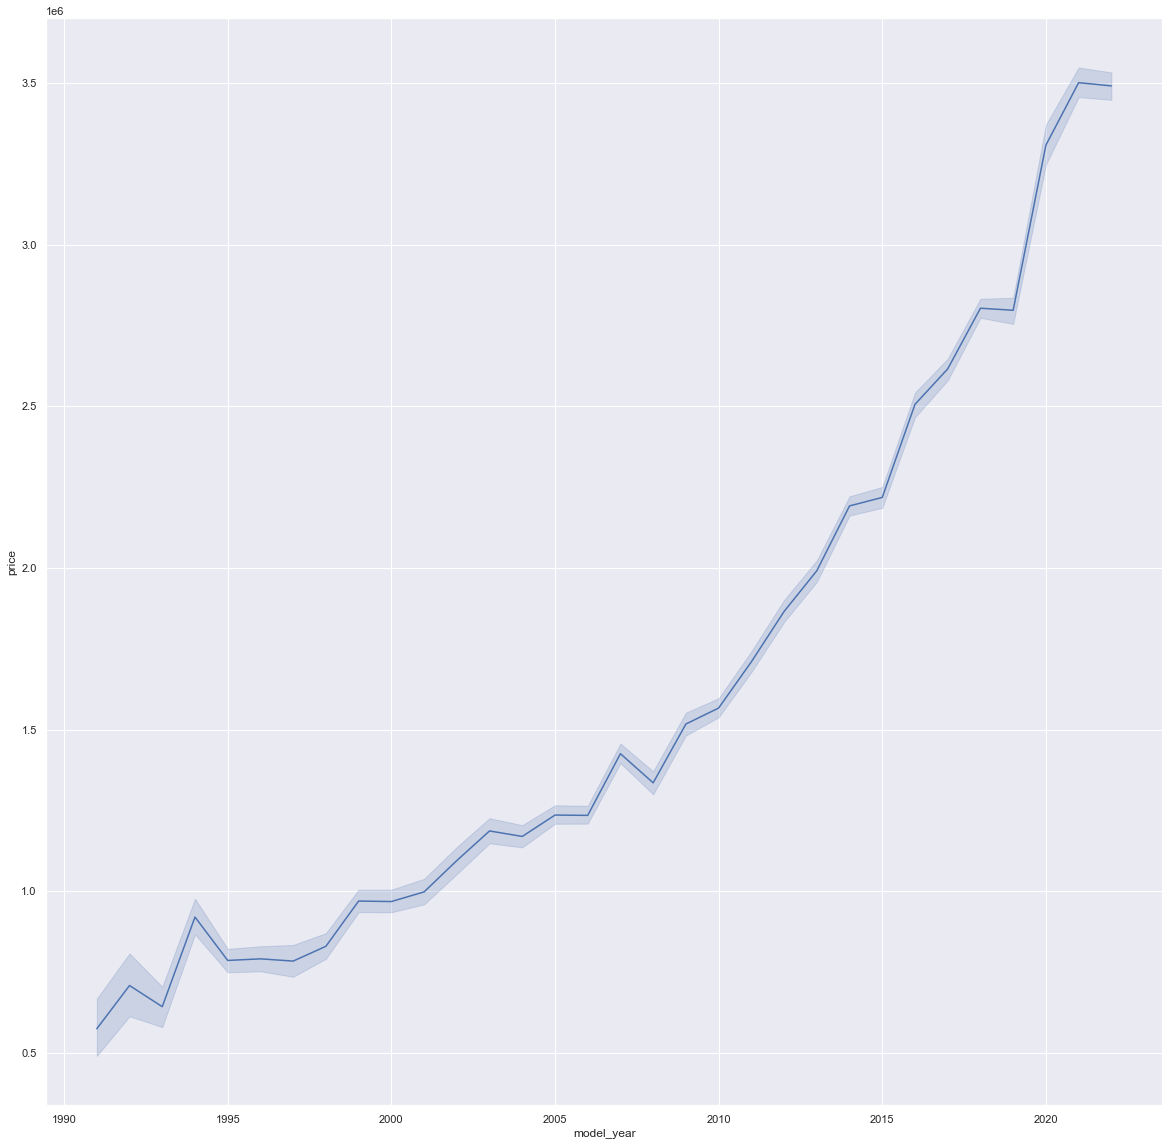

<AxesSubplot:xlabel='model_year', ylabel='price'>

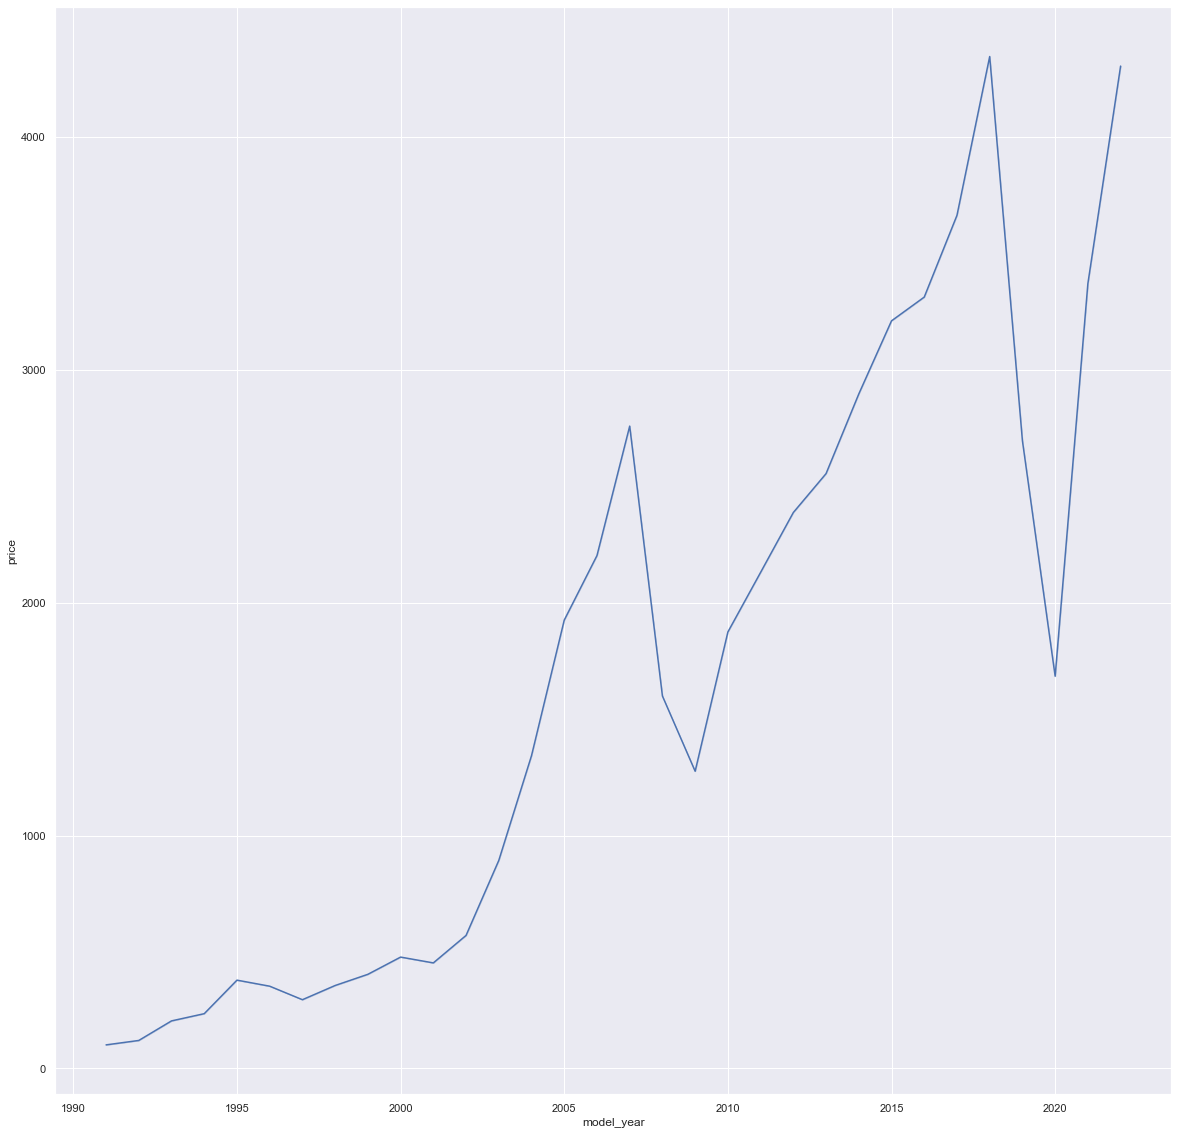

In [246]:
sns.lineplot(x='model_year',y='price',data=ffdf)
plt.show()
sns.lineplot(x='model_year',y='price',data=ffdf,estimator=len)

In [247]:
ffdf['registered_in'].value_counts()

Lahore            15540
Islamabad         11320
Karachi            8319
Un-Registered      6550
Sindh              4288
                  ...  
Daharki               1
Babri banda           1
Mian Channu           1
Swatmingora           1
Nowshera cantt        1
Name: registered_in, Length: 120, dtype: int64

<AxesSubplot:xlabel='price', ylabel='registered_in'>

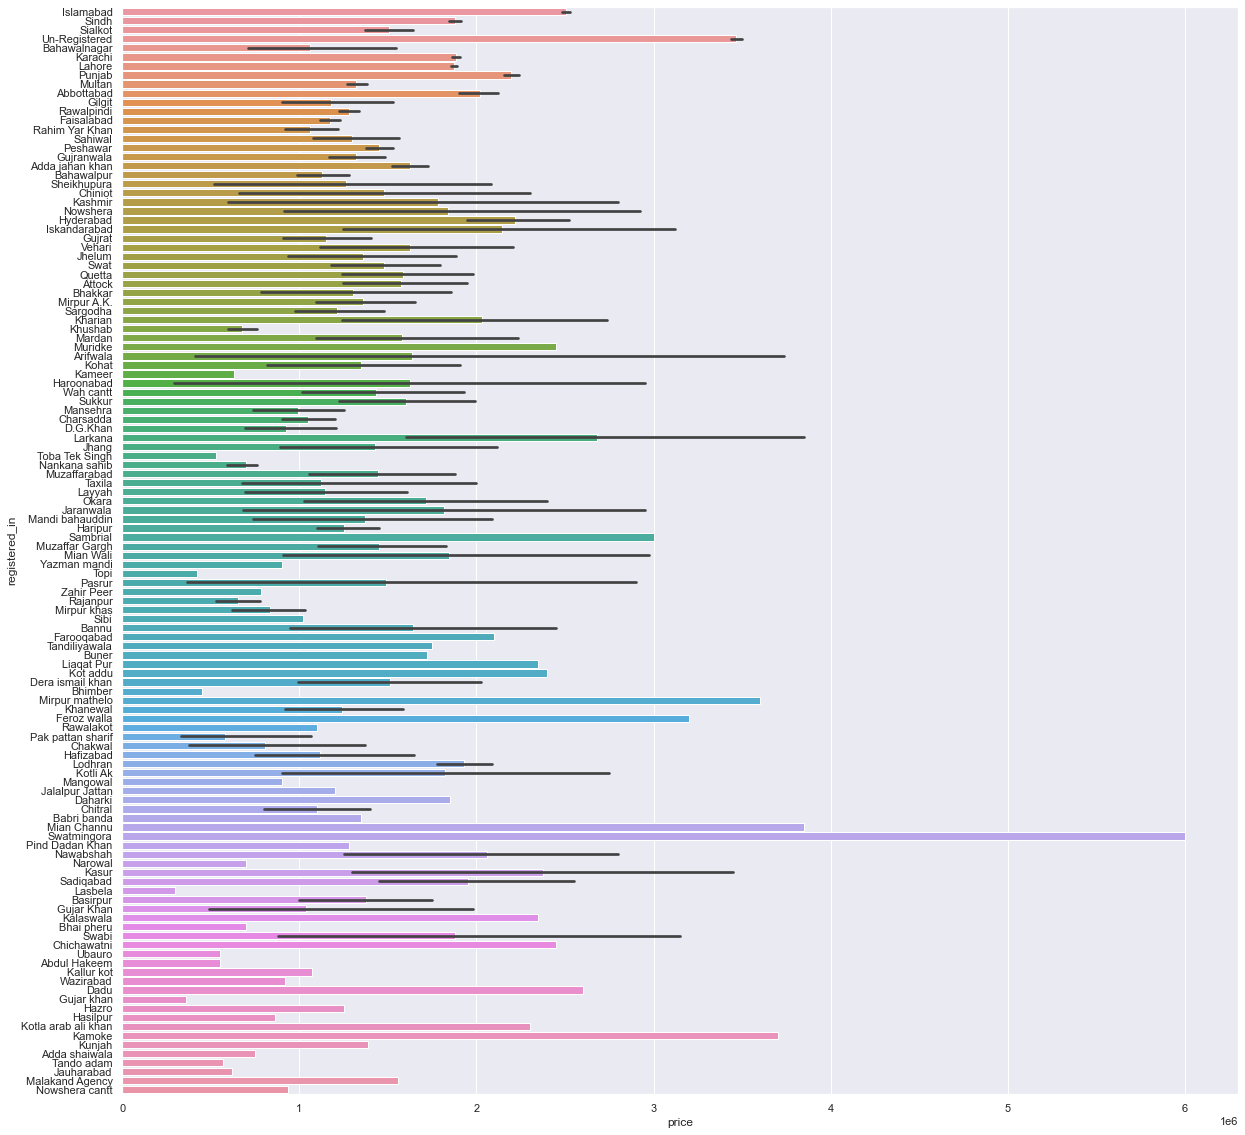

In [248]:
sns.barplot(x='price',y='registered_in',data=ffdf)

<AxesSubplot:xlabel='price', ylabel='registered_in'>

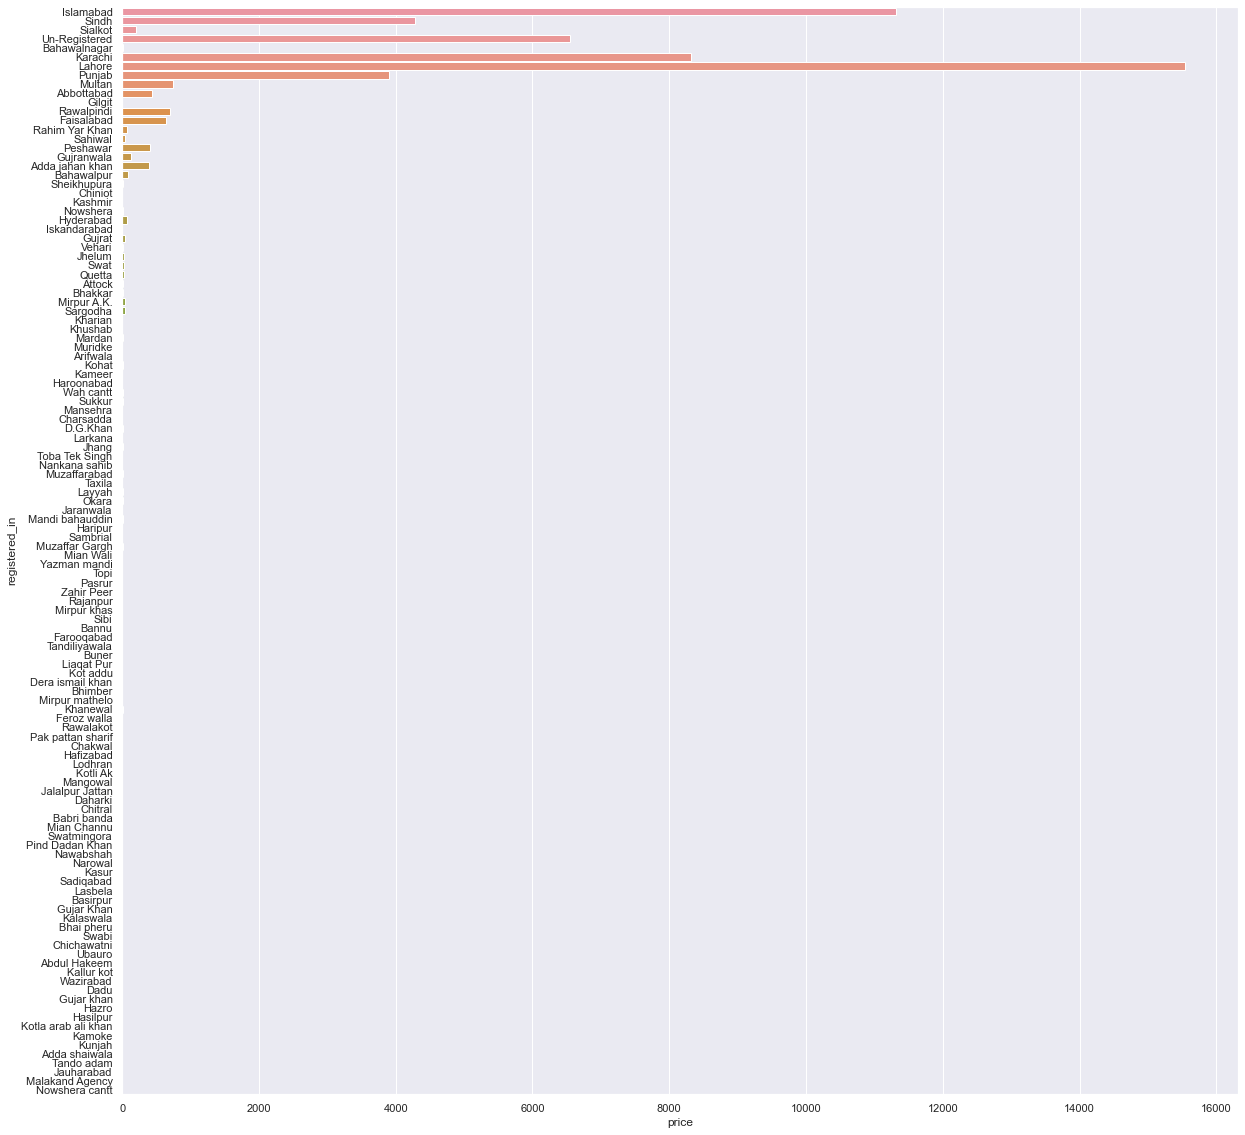

In [249]:
sns.barplot(x='price',y='registered_in',data=ffdf,estimator=len)

<AxesSubplot:xlabel='assembly', ylabel='price'>

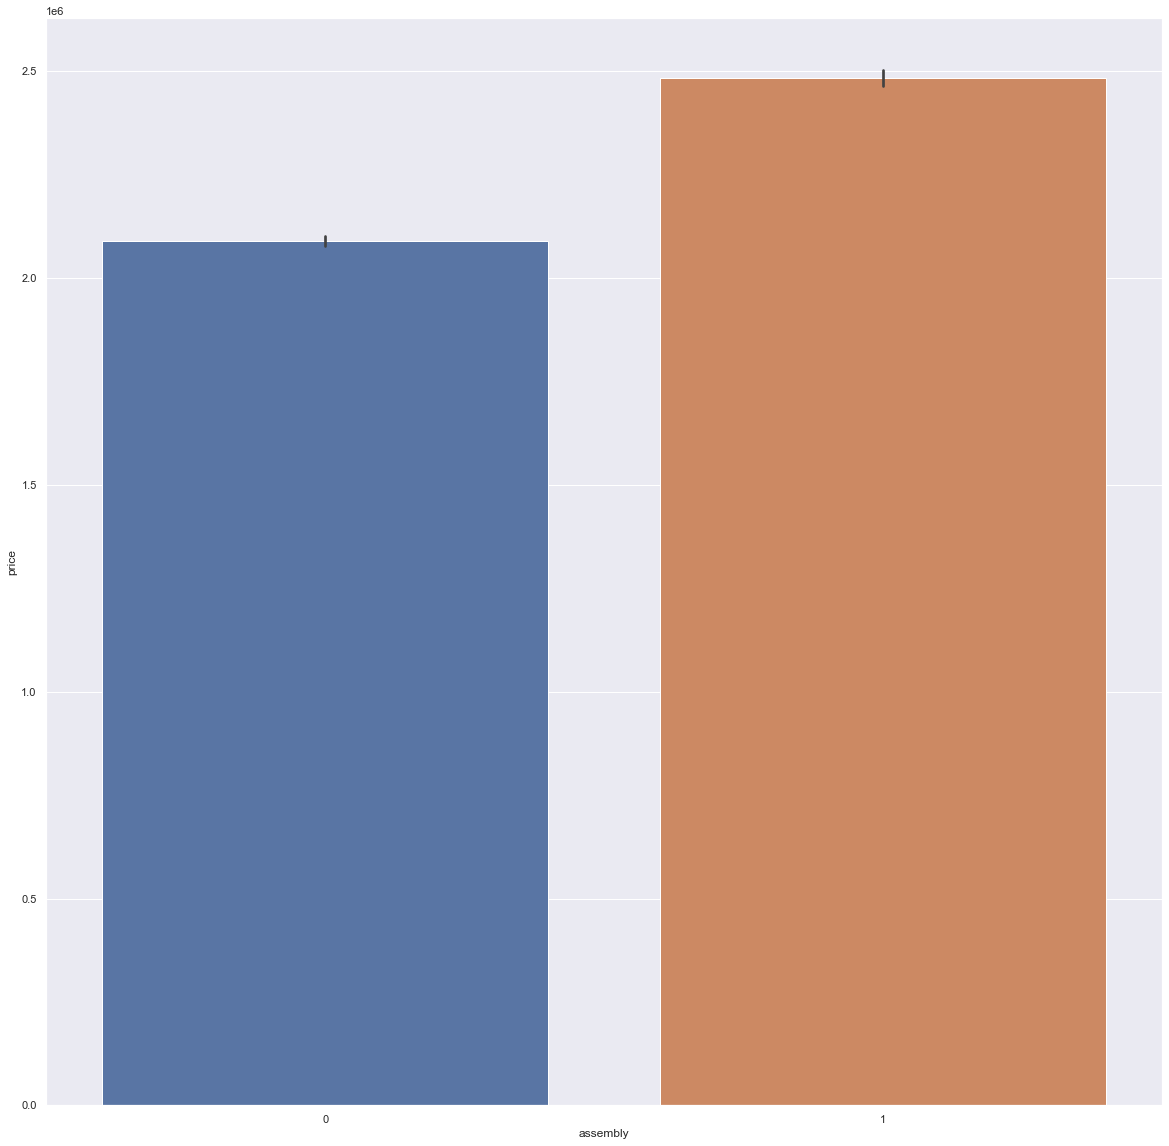

In [250]:
sns.barplot(x='assembly',y='price',data=ffdf,estimator=np.mean)

<AxesSubplot:xlabel='model_year', ylabel='price'>

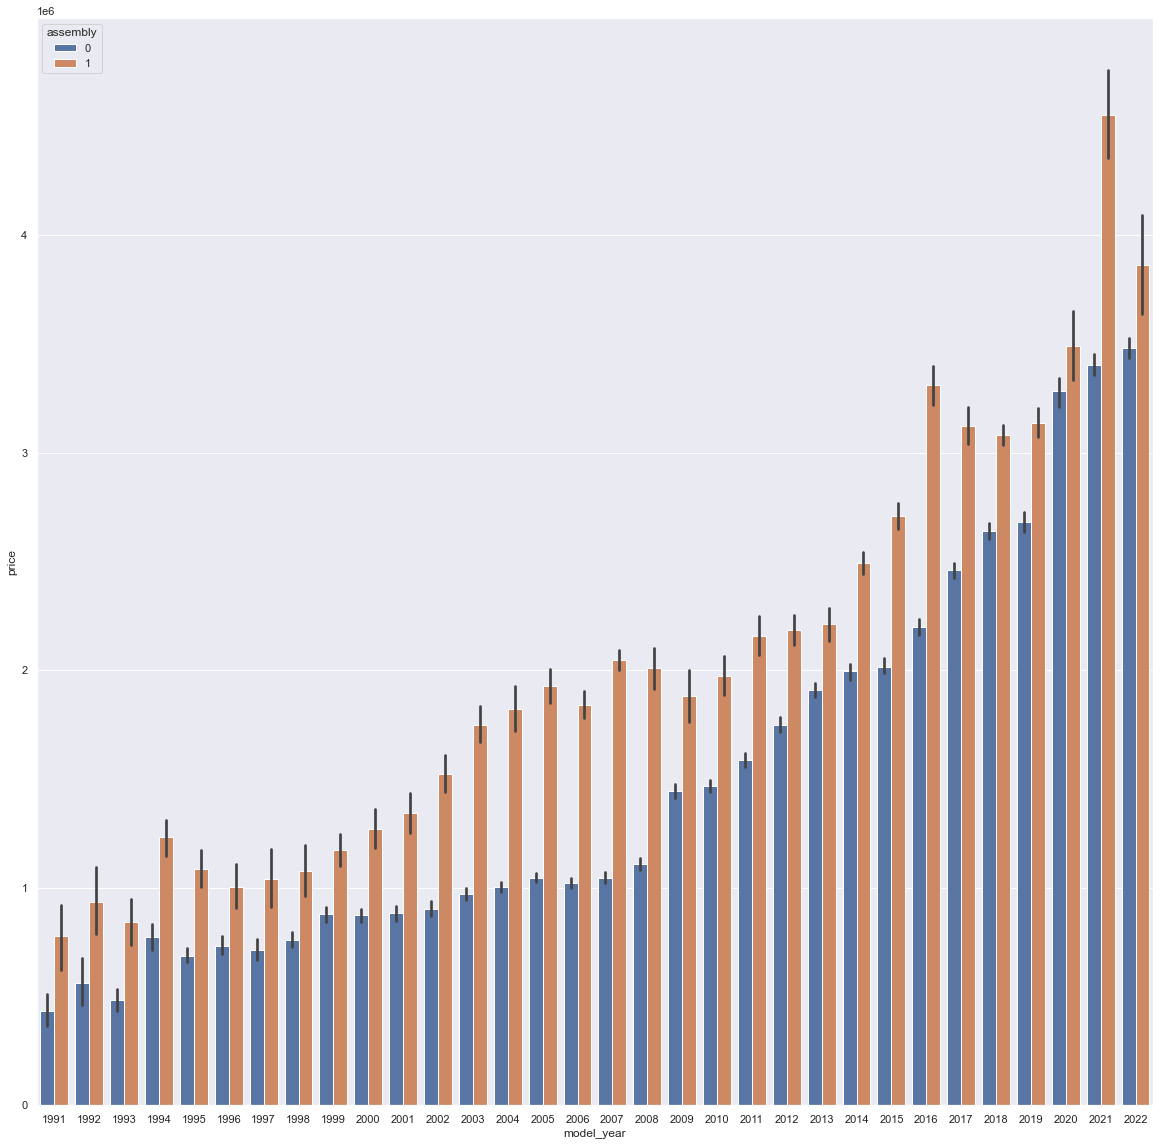

In [251]:
sns.barplot(x='model_year',y='price',hue='assembly',data=ffdf,estimator=np.mean)

<AxesSubplot:xlabel='model_year', ylabel='price'>

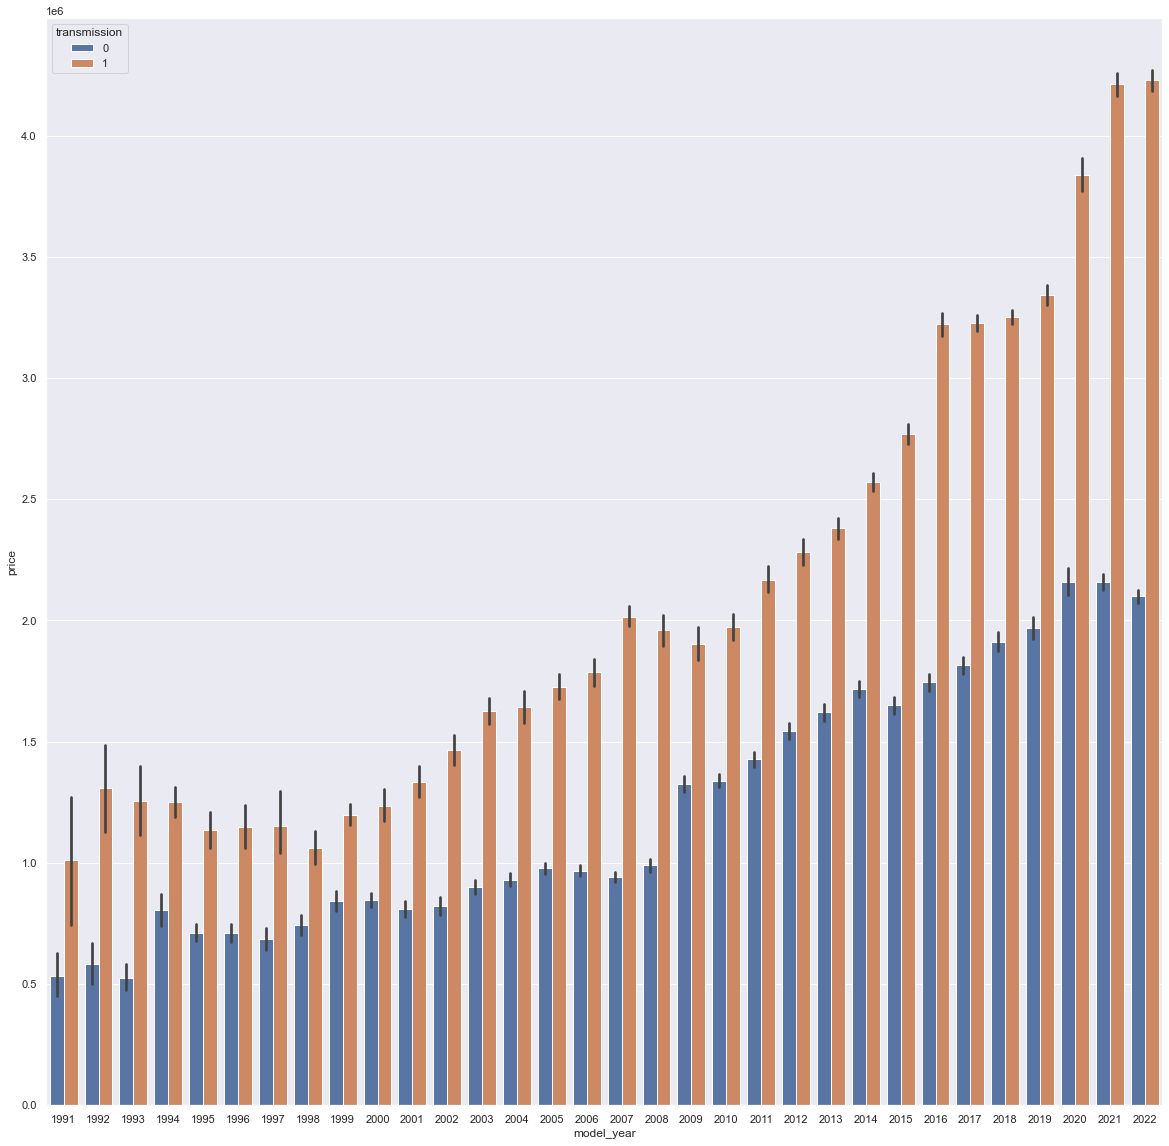

In [252]:
sns.barplot(x='model_year',y='price',hue='transmission',data=ffdf,estimator=np.mean)

<AxesSubplot:xlabel='color', ylabel='price'>

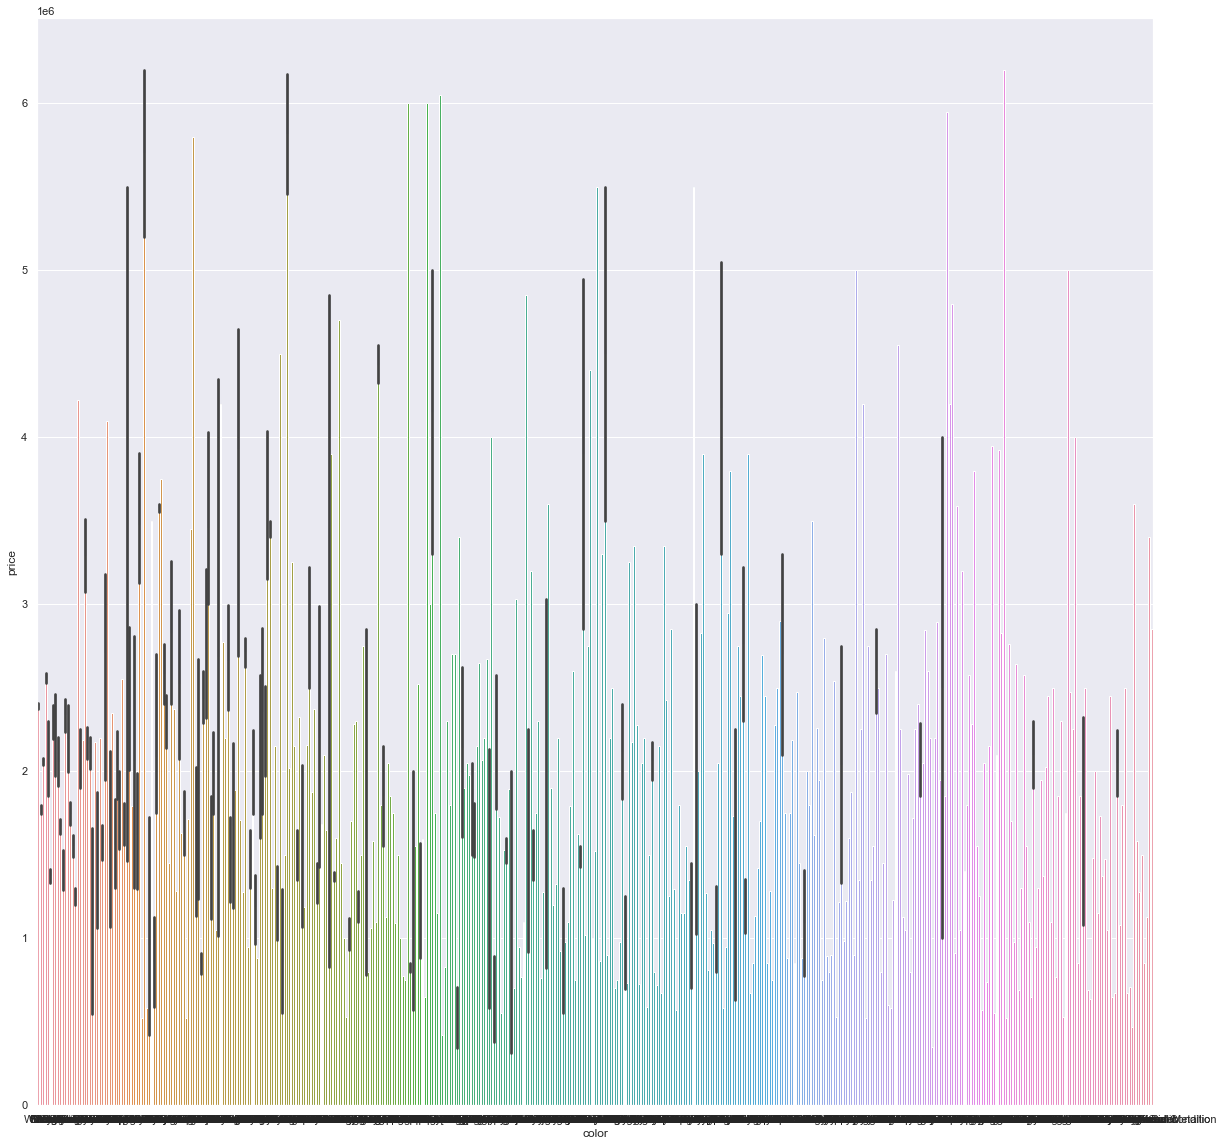

In [253]:
sns.barplot(y='price',x='color',data=ffdf,estimator=np.mean)

<AxesSubplot:xlabel='engine_type', ylabel='price'>

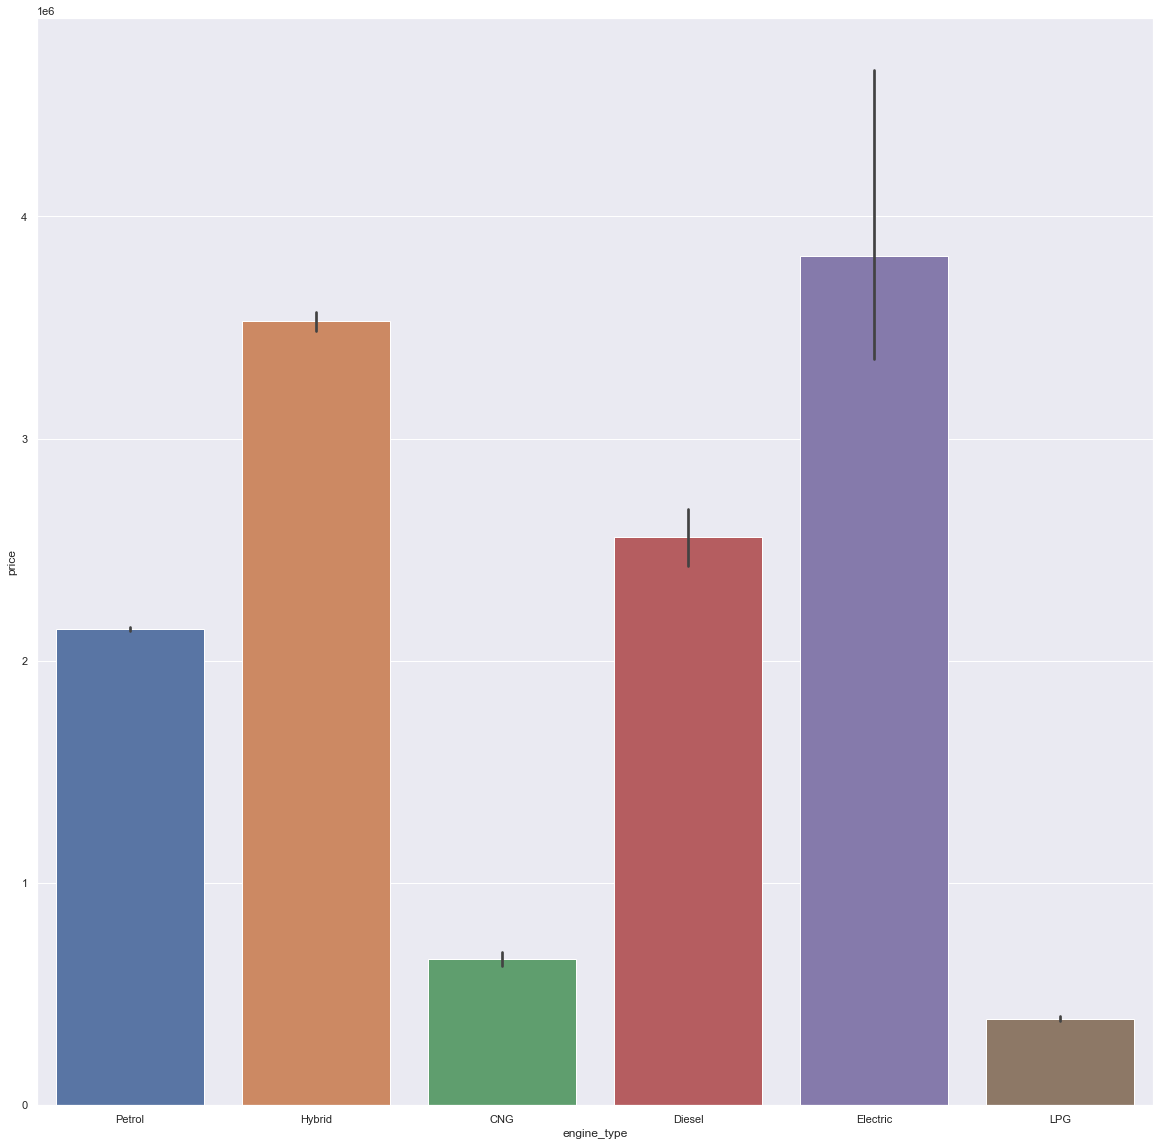

In [254]:
sns.barplot(x='engine_type',y='price',data=ffdf,estimator=np.mean)

<AxesSubplot:xlabel='engine_type', ylabel='price'>

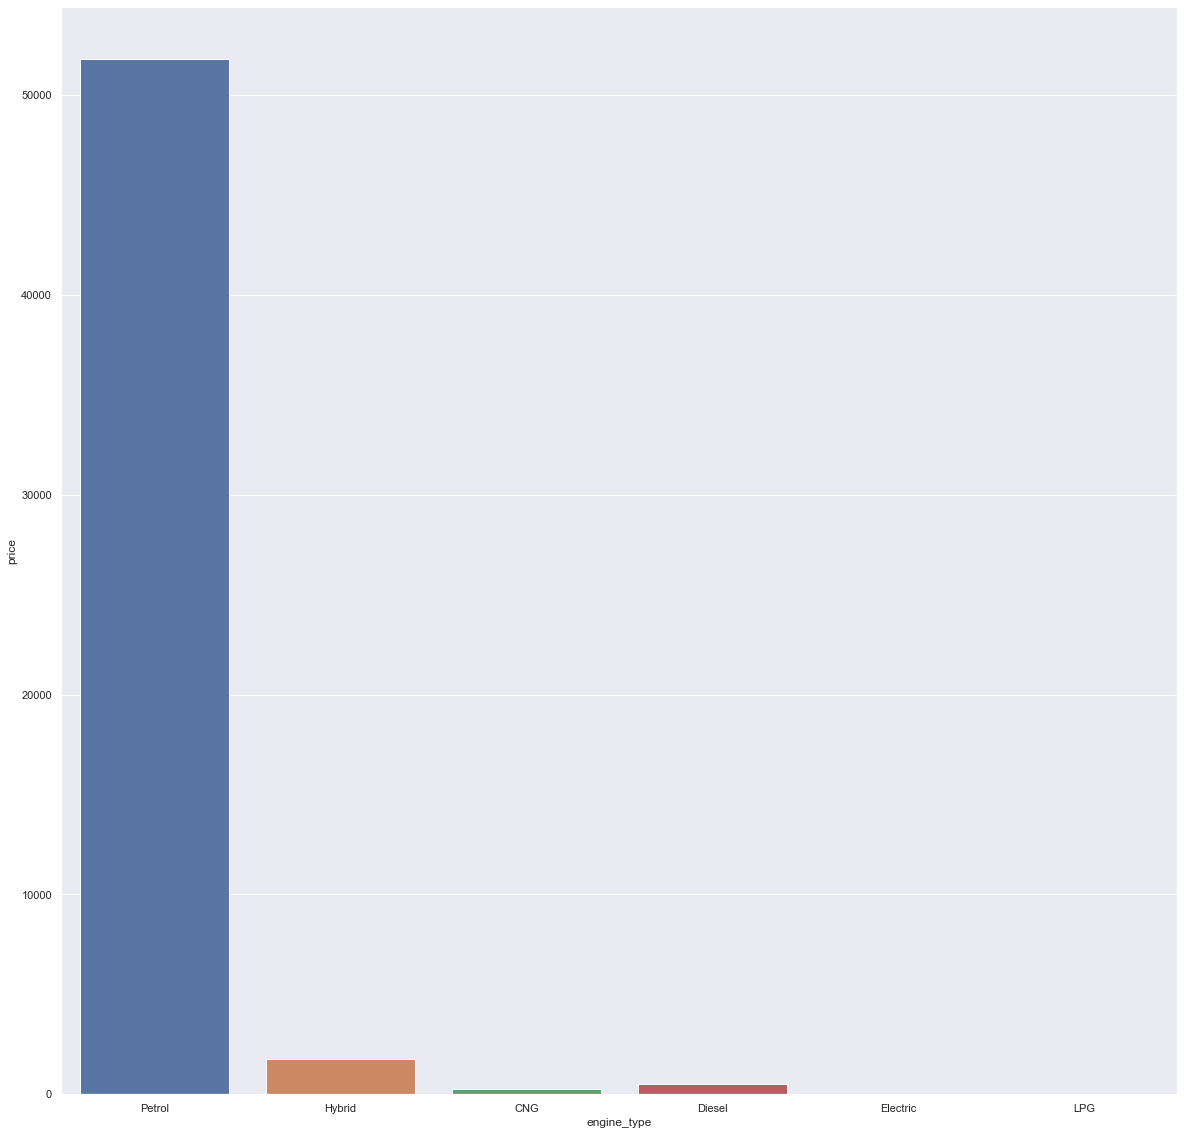

In [255]:
sns.barplot(x='engine_type',y='price',data=ffdf,estimator=len)

<AxesSubplot:xlabel='body_type', ylabel='price'>

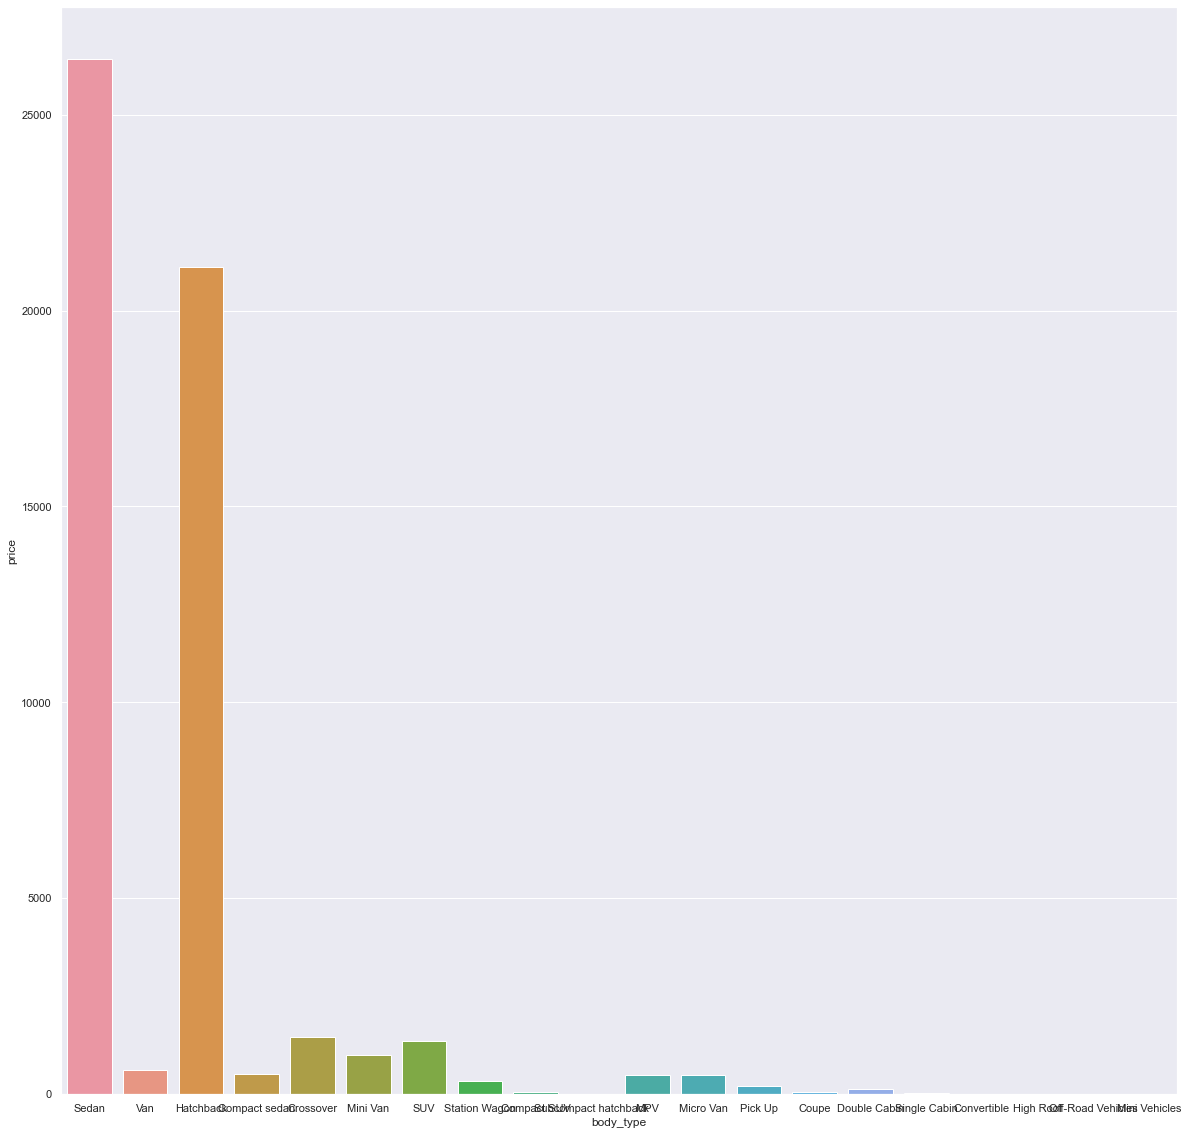

In [256]:
sns.barplot(data=ffdf,x='body_type',y='price',estimator=len)

<AxesSubplot:xlabel='age', ylabel='price'>

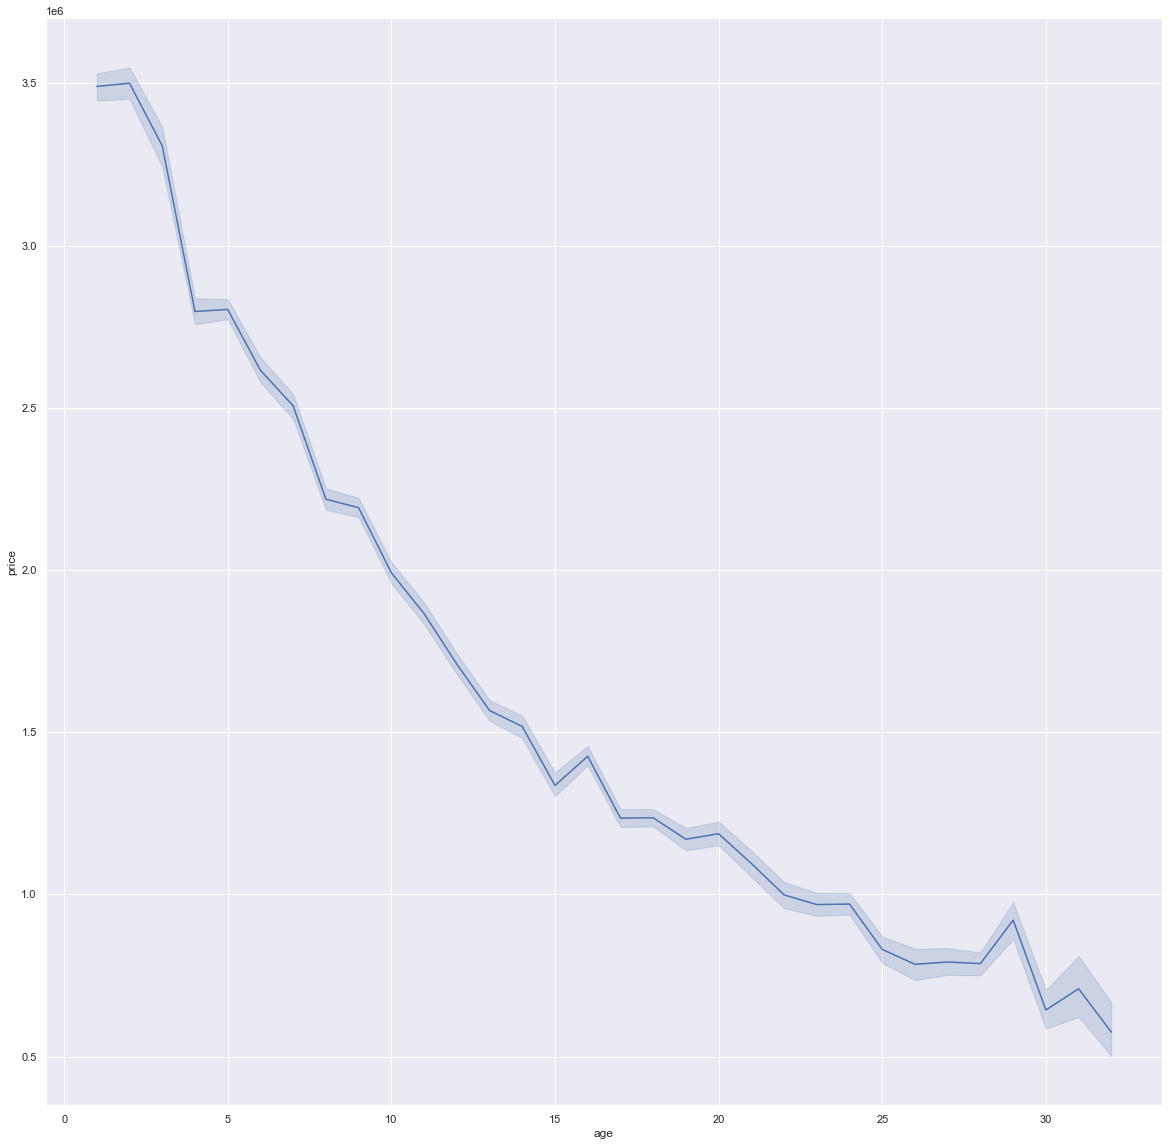

In [261]:
sns.lineplot(x='age',y='price',data=ffdf,estimator=np.mean)

<AxesSubplot:xlabel='age', ylabel='price'>

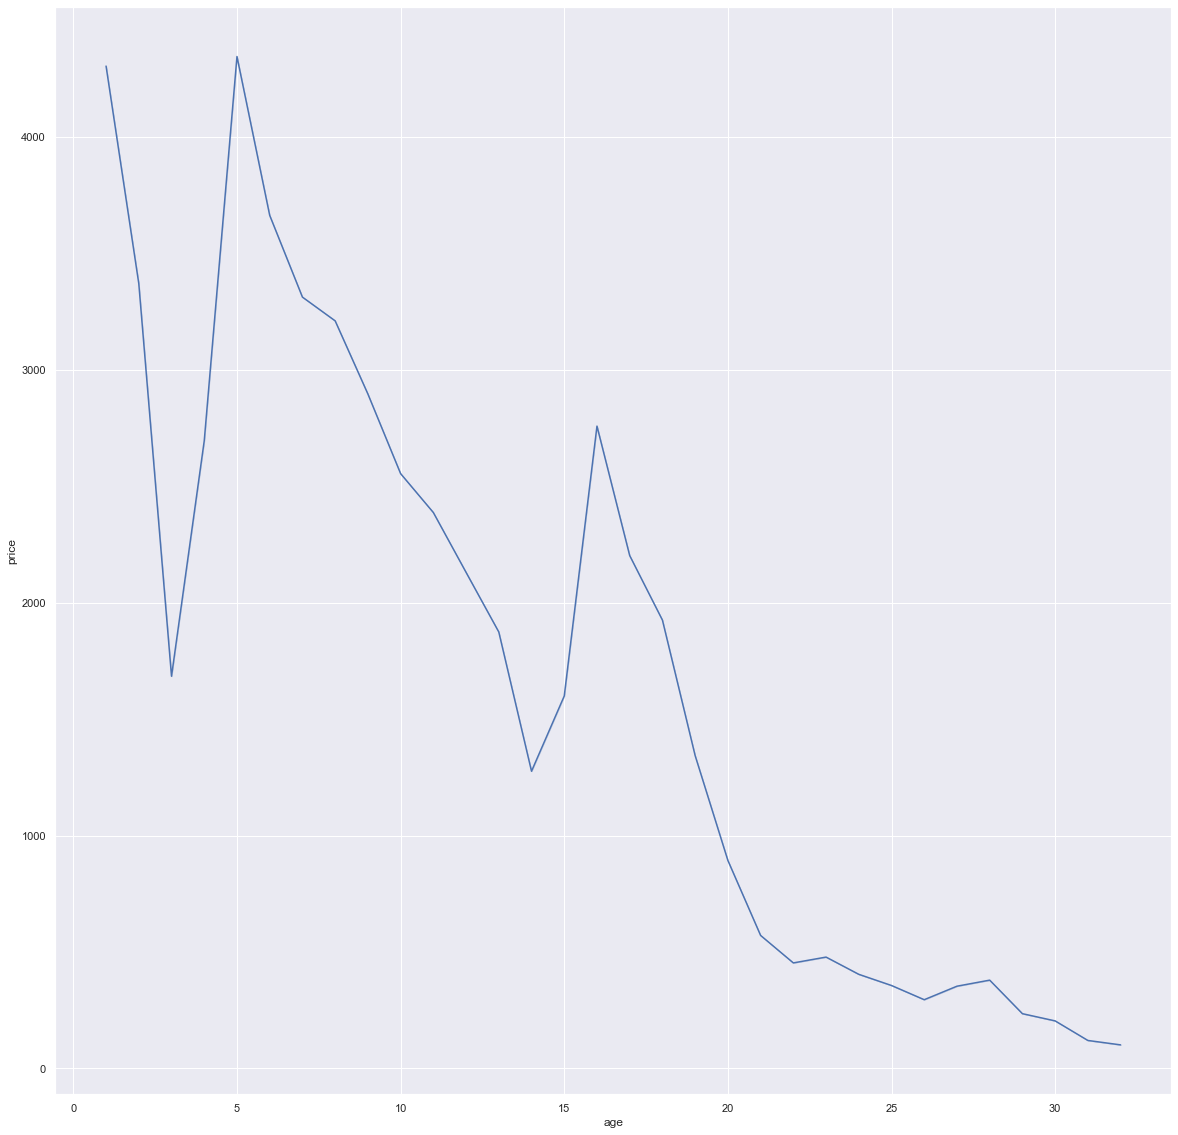

In [262]:
sns.lineplot(x='age',y='price',data=ffdf,estimator=len)

# preparing for models

In [263]:
ffdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54369 entries, 2 to 75898
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           54369 non-null  object  
 1   location       54369 non-null  object  
 2   model_year     54369 non-null  int64   
 3   engine_type    54369 non-null  object  
 4   transmission   54369 non-null  int64   
 5   registered_in  54369 non-null  object  
 6   color          54369 non-null  object  
 7   assembly       54369 non-null  int64   
 8   body_type      54369 non-null  object  
 9   price          54369 non-null  float64 
 10  Gas            54369 non-null  float64 
 11  electric       54369 non-null  float64 
 12  miles          54369 non-null  category
 13  age            54369 non-null  int64   
dtypes: category(1), float64(3), int64(4), object(6)
memory usage: 7.9+ MB


In [264]:
models=list(ffdf['name'])

In [265]:
ffdf['name']=ffdf['name'].apply(lambda x :  x[0:x.find(' ')])

C:\Users\zacks\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [266]:
ffdf.head()

,name,location,model_year,engine_type,transmission,registered_in,color,assembly,body_type,price,Gas,electric,miles,age
2,Honda,"I- 8, Islamabad Islamabad",2016,Petrol,0,Islamabad,White,0,Sedan,2375000.0,1300.0,0.0,60000,7
3,Suzuki,"Dhok Sayedan Road, Rawalpindi Punjab",2018,Petrol,0,Islamabad,White,0,Van,1050000.0,800.0,0.0,60000,5
4,Suzuki,Karachi Sindh,2022,Petrol,1,Sindh,Grey,0,Hatchback,3550000.0,1200.0,0.0,<10000,1
6,Honda,"Cantt, Sialkot Punjab",2006,Petrol,0,Sialkot,White,0,Sedan,1490000.0,1300.0,0.0,<<,17
7,Toyota,Islamabad Islamabad,2017,Hybrid,1,Un-Registered,Silver,1,Hatchback,3650000.0,1500.0,0.0,<<,6


In [267]:
ffdf.drop(['location','engine_type','color'],axis=1,inplace=True)

C:\Users\zacks\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [268]:
ffdf.drop(['registered_in'],axis=1,inplace=True)

In [269]:
ffdf.head()

,name,model_year,transmission,assembly,body_type,price,Gas,electric,miles,age
2,Honda,2016,0,0,Sedan,2375000.0,1300.0,0.0,60000,7
3,Suzuki,2018,0,0,Van,1050000.0,800.0,0.0,60000,5
4,Suzuki,2022,1,0,Hatchback,3550000.0,1200.0,0.0,<10000,1
6,Honda,2006,0,0,Sedan,1490000.0,1300.0,0.0,<<,17
7,Toyota,2017,1,1,Hatchback,3650000.0,1500.0,0.0,<<,6


In [270]:
uniq_type=ffdf['body_type'].unique()

In [271]:
uniq_type

array(['Sedan', 'Van', 'Hatchback', 'Compact sedan', 'Crossover',
       'Mini Van', 'SUV', 'Station Wagon', 'Compact SUV',
       'Subcompact hatchback', 'MPV', 'Micro Van', 'Pick Up', 'Coupe',
       'Double Cabin', 'Single Cabin', 'Convertible', 'High Roof',
       'Off-Road Vehicles', 'Mini Vehicles'], dtype=object)

In [272]:
for i in uniq_type:
    for j in ffdf['body_type']:
        ffdf[i]=int(j==i)

C:\Users\zacks\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [273]:
ffdf.head()

,name,model_year,transmission,assembly,body_type,price,Gas,electric,miles,age,...,MPV,Micro Van,Pick Up,Coupe,Double Cabin,Single Cabin,Convertible,High Roof,Off-Road Vehicles,Mini Vehicles
2,Honda,2016,0,0,Sedan,2375000.0,1300.0,0.0,60000,7,...,0,0,0,0,0,0,0,0,0,0
3,Suzuki,2018,0,0,Van,1050000.0,800.0,0.0,60000,5,...,0,0,0,0,0,0,0,0,0,0
4,Suzuki,2022,1,0,Hatchback,3550000.0,1200.0,0.0,<10000,1,...,0,0,0,0,0,0,0,0,0,0
6,Honda,2006,0,0,Sedan,1490000.0,1300.0,0.0,<<,17,...,0,0,0,0,0,0,0,0,0,0
7,Toyota,2017,1,1,Hatchback,3650000.0,1500.0,0.0,<<,6,...,0,0,0,0,0,0,0,0,0,0


In [274]:
uniq_miles=ffdf['miles'].unique()

In [275]:
for i in uniq_miles:
    for j in ffdf['miles']:
        ffdf[i]=int(j==i)

C:\Users\zacks\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [276]:
ffdf.head()

,name,model_year,transmission,assembly,body_type,price,Gas,electric,miles,age,...,Mini Vehicles,60000,<10000,<<,>80000,70000,40000,50000,20000,30000
2,Honda,2016,0,0,Sedan,2375000.0,1300.0,0.0,60000,7,...,0,0,0,1,0,0,0,0,0,0
3,Suzuki,2018,0,0,Van,1050000.0,800.0,0.0,60000,5,...,0,0,0,1,0,0,0,0,0,0
4,Suzuki,2022,1,0,Hatchback,3550000.0,1200.0,0.0,<10000,1,...,0,0,0,1,0,0,0,0,0,0
6,Honda,2006,0,0,Sedan,1490000.0,1300.0,0.0,<<,17,...,0,0,0,1,0,0,0,0,0,0
7,Toyota,2017,1,1,Hatchback,3650000.0,1500.0,0.0,<<,6,...,0,0,0,1,0,0,0,0,0,0


In [277]:
ffdf.drop(['body_type','miles'],axis=1,inplace=True)

C:\Users\zacks\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [278]:
ffdf.head()

,name,model_year,transmission,assembly,price,Gas,electric,age,Sedan,Van,...,Mini Vehicles,60000,<10000,<<,>80000,70000,40000,50000,20000,30000
2,Honda,2016,0,0,2375000.0,1300.0,0.0,7,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Suzuki,2018,0,0,1050000.0,800.0,0.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Suzuki,2022,1,0,3550000.0,1200.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,Honda,2006,0,0,1490000.0,1300.0,0.0,17,0,0,...,0,0,0,1,0,0,0,0,0,0
7,Toyota,2017,1,1,3650000.0,1500.0,0.0,6,0,0,...,0,0,0,1,0,0,0,0,0,0


In [279]:
uniq_name=ffdf['name'].unique()

In [280]:
for i in uniq_name:
    for j in ffdf['name']:
        ffdf[i]=int(j==i)

C:\Users\zacks\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [281]:
ffdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54369 entries, 2 to 75898
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  54369 non-null  object 
 1   model_year            54369 non-null  int64  
 2   transmission          54369 non-null  int64  
 3   assembly              54369 non-null  int64  
 4   price                 54369 non-null  float64
 5   Gas                   54369 non-null  float64
 6   electric              54369 non-null  float64
 7   age                   54369 non-null  int64  
 8   Sedan                 54369 non-null  int64  
 9   Van                   54369 non-null  int64  
 10  Hatchback             54369 non-null  int64  
 11  Compact sedan         54369 non-null  int64  
 12  Crossover             54369 non-null  int64  
 13  Mini Van              54369 non-null  int64  
 14  SUV                   54369 non-null  int64  
 15  Station Wagon      

In [282]:
ffdf.drop(['name'],axis=1,inplace=True)

C:\Users\zacks\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [283]:
ffdf.head()

,model_year,transmission,assembly,price,Gas,electric,age,Sedan,Van,Hatchback,...,Chery,Lexus,Volkswagen,Land,Fiat,Haval,Jinbei,MINI,SsangYong,Adam
2,2016,0,0,2375000.0,1300.0,0.0,7,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,0,1050000.0,800.0,0.0,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2022,1,0,3550000.0,1200.0,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2006,0,0,1490000.0,1300.0,0.0,17,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2017,1,1,3650000.0,1500.0,0.0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [284]:
ffdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54369 entries, 2 to 75898
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model_year            54369 non-null  int64  
 1   transmission          54369 non-null  int64  
 2   assembly              54369 non-null  int64  
 3   price                 54369 non-null  float64
 4   Gas                   54369 non-null  float64
 5   electric              54369 non-null  float64
 6   age                   54369 non-null  int64  
 7   Sedan                 54369 non-null  int64  
 8   Van                   54369 non-null  int64  
 9   Hatchback             54369 non-null  int64  
 10  Compact sedan         54369 non-null  int64  
 11  Crossover             54369 non-null  int64  
 12  Mini Van              54369 non-null  int64  
 13  SUV                   54369 non-null  int64  
 14  Station Wagon         54369 non-null  int64  
 15  Compact SUV        

In [285]:
ls=['model_year','electric','Gas','age']

In [286]:
sc=ss()

In [287]:
ffdf[ls]=sc.fit_transform(ffdf[ls])

C:\Users\zacks\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [288]:
ffdf.head()

,model_year,transmission,assembly,price,Gas,electric,age,Sedan,Van,Hatchback,...,Chery,Lexus,Volkswagen,Land,Fiat,Haval,Jinbei,MINI,SsangYong,Adam
2,0.452426,0,0,2375000.0,0.061545,-0.005677,-0.452426,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.746435,0,0,1050000.0,-1.224073,-0.005677,-0.746435,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.334453,1,0,3550000.0,-0.195579,-0.005677,-1.334453,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,-1.017618,0,0,1490000.0,0.061545,-0.005677,1.017618,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0.599431,1,1,3650000.0,0.575792,-0.005677,-0.599431,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [294]:
x=ffdf.drop(['price'],axis=1).values

In [295]:
y=ffdf['price'].values

In [297]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)

In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [313]:
models={
    'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(n_neighbors=3),
    'SVR':SVR(kernel='linear'),    
    'SVR':SVR(kernel='rbf')
}

In [309]:
for model in models.items():
    print('using: ',model[0])
    model=model[1]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('Training Score: ',model.score(x_train,y_train))
    print('Testing Score: ',model.score(x_test,y_test))
    print('_'*30)

using:  LR
Training Score:  0.7913363272839906
Testing Score:  0.7918079683279922
______________________________
using:  KNN
Training Score:  0.8851448604361022
Testing Score:  0.8809782034617677
______________________________
using:  SVR
Training Score:  0.02730559509374697
Testing Score:  0.02271870549751087
______________________________
using:  SVRrbf
Training Score:  -0.03174939582644898
Testing Score:  -0.035936731346383644
______________________________


In [312]:
y_pred-y_test[:]

array([1485538.99909814,   30034.66786347,  258764.46692876, ...,
        726361.69613744,   38505.97209024, -416633.8574609 ])

In [ ]:
models={
    'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(n_neighbors=3),
    'SVR':SVR(kernel='poly'),    
}

In [314]:
for model in models.items():
    print('using: ',model[0])
    model=model[1]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('Training Score: ',model.score(x_train,y_train))
    print('Testing Score: ',model.score(x_test,y_test))
    print('_'*30)

using:  LR
Training Score:  0.7913363272839906
Testing Score:  0.7918079683279922
______________________________
using:  KNN
Training Score:  0.8851448604361022
Testing Score:  0.8809782034617677
______________________________
using:  SVR
Training Score:  -0.02953651600809648
Testing Score:  -0.033886426717120166
______________________________
